<a href="https://colab.research.google.com/github/Fentahun60/Fentahun/blob/main/Numerical_Var__Zambia_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Path to your .dta file
file_path = '/content/drive/MyDrive/zambia_CC_BC.dta'

# Read the .dta file into a pandas DataFrame
try:
    df = pd.read_stata(file_path)
    print("File imported successfully! First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the path is correct and Google Drive is mounted.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File imported successfully! First 5 rows:
  v000  v001    v005  v007  v012   v025       v106    v151 v152  \
0  ZM8     1  748300  2024    42  urban    primary    male   44   
1  ZM8     1  748300  2024    42  urban     higher  female   41   
2  ZM8     1  748300  2024    24  urban    primary  female   24   
3  ZM8     1  748300  2024    22  urban  secondary    male   26   
4  ZM8     1  748300  2024    32  urban    primary  female   32   

                   v157  ... v481 v484a v484b  \
0            not at all  ...   no    no    no   
1  at least once a week  ...  yes   yes   yes   
2  at least once a week  ...   no    no    no   
3            not at all  ...   no    no    no   
4  at least once a week  ...   no    no   yes   

                                  v501 v525 v763a v763b v763c v781 v836  
0                              married   22    no    no  

In [146]:
# Assuming your dataframe is df

rename_dict = {
    "v012": "respondent_age",
    "v025": "residence_type",
    "v106": "highest_edu_level",
    "v151": "sex_of_household_head",
    "v152": "age_of_household_head",
    "v157": "freq_read_newspaper",
    "v158": "freq_listen_radio",
    "v159": "freq_watch_tv",
    "v169a": "owns_mobile_phone",
    "v190": "wealth_index",
    "v312": "current_contraceptive_method",
    "v394": "visited_health_facility_12mo",
    "v463a": "smokes_cigarettes",
    "v467b": "permission_to_medical_Vist",
    "v467c": "money_needed_for_medical_vist",
    "v467d": "distance_to_health_facility",
    "v467e": "transport_for_medical_visit",
    "v467k": "waiting_time_concern_at_HF",
    "v481": "covered_by_health_insurance",
    "v484a": "breast_exam_by_provider",
    "v484b": "cervical_cancer_tested",
    "v501": "marital_status",
    "v525": "age_at_first_sex",
    "v763a": "STI_last_12mo",
    "v763b": "genital_sore_last_12mo",
    "v763c": "genital_discharge_last_12mo",
    "v781": "ever_tested_hiv",
    "v836": "total_lifetime_sex_partners"
}

# Apply renaming
df = df.rename(columns=rename_dict)

df.head()


,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_read_newspaper,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,42,urban,primary,male,44,not at all,...,no,no,no,married,22,no,no,no,yes,2.0
1,ZM8,1,748300,2024,42,urban,higher,female,41,at least once a week,...,yes,yes,yes,married,17,no,no,no,yes,3.0
2,ZM8,1,748300,2024,24,urban,primary,female,24,at least once a week,...,no,no,no,no longer living together/separated,16,no,yes,yes,yes,3.0
3,ZM8,1,748300,2024,22,urban,secondary,male,26,not at all,...,no,no,no,married,15,yes,no,no,yes,5.0
4,ZM8,1,748300,2024,32,urban,primary,female,32,at least once a week,...,no,no,yes,never in union,15,no,no,no,yes,3.0


In [147]:
df.columns

Index(['v000', 'v001', 'v005', 'v007', 'respondent_age', 'residence_type',
       'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_read_newspaper', 'freq_listen_radio', 'freq_watch_tv',
       'owns_mobile_phone', 'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [148]:
df["freq_listen_radio"] = df["freq_listen_radio"].replace({
    "not at all": "No",
    "less than once a week": "No",
    "at least once a week": "Yes",
    "almost every day": "Yes"})

In [149]:
df["freq_watch_tv"] = df["freq_watch_tv"].replace({
    "not at all": "No",
    "less than once a week": "No",
    "at least once a week": "Yes",
    "almost every day": "Yes"})

In [150]:
df["current_contraceptive_method"] = df["current_contraceptive_method"].replace({

    # Hormonal
    "pill": "Hormonal",
    "injections": "Hormonal",
    "implants/norplant": "Hormonal",
    "emergency contraception": "Hormonal",
    "lactational amenorrhea (lam)": "Hormonal",

    # Non-hormonal
    "not using": "Non-Hormonal",
    "iud": "Non-Hormonal",
    "male condom": "Non-Hormonal",
    "female condom": "Non-Hormonal",
    "female sterilization": "Non-Hormonal",
    "periodic abstinence": "Non-Hormonal",
    "withdrawal": "Non-Hormonal",
    "other traditional": "Non-Hormonal",
    "other modern method": "Non-Hormonal",
    "standard days method (sdm)": "Non-Hormonal"
})


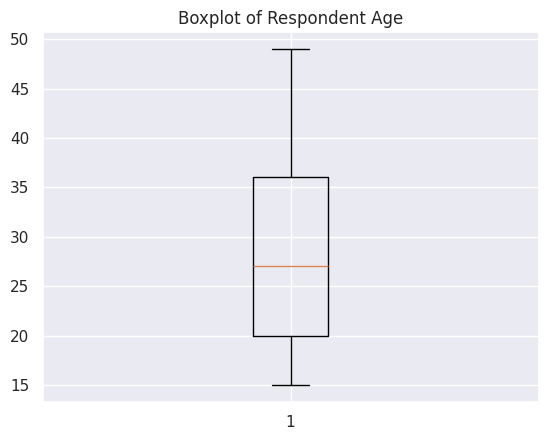

In [151]:
import matplotlib.pyplot as plt

plt.boxplot(df['respondent_age'])
plt.title("Boxplot of Respondent Age")
plt.show()


In [152]:
# Min-Max Normalization
df['respondent_age'] = (df['respondent_age'] - df['respondent_age'].min()) / \
                                  (df['respondent_age'].max() - df['respondent_age'].min())

# Display first few rows to check
print(df[['respondent_age', 'respondent_age']].head())


   respondent_age  respondent_age
0        0.794118        0.794118
1        0.794118        0.794118
2        0.264706        0.264706
3        0.205882        0.205882
4        0.500000        0.500000


In [153]:
import pandas as pd
import numpy as np

# Example: your dataframe is df and the column is 'age_at_first_sex'

def recategorize_age(x):
    # Handle non-numeric values first
    if pd.isna(x):
        return np.nan
    if isinstance(x, str) and x.lower() == "not had sex":
        return "not had sex"

    # Convert to numeric if it's a string number
    try:
        x = float(x)
    except:
        return np.nan

    # Categorize
    if x < 15:
        return "<15"
    elif 15 <= x <= 17:
        return "15-17"
    elif 18 <= x <= 19:
        return "18-19"
    elif x >= 20:
        return ">20"
    else:
        return np.nan

# Apply to dataframe
df["age_at_first_sex"] = df["age_at_first_sex"].apply(recategorize_age)

# View result
df["age_at_first_sex"].value_counts(dropna=False)


,count
age_at_first_sex,
15-17,6497
<15,2392
18-19,2105
not had sex,1707
>20,1250


In [154]:
df['total_lifetime_sex_partners'].dtype
df['total_lifetime_sex_partners'].unique()  # see if there are unexpected strings


[2.0, 3.0, 5.0, 4.0, NaN, ..., 25.0, 35.0, 27.0, 50.0, 29.0]
Length: 29
Categories (28, object): [1.0 < 2.0 < 3.0 < 4.0 ... 47.0 < 50.0 < '95+' < 'don't know']

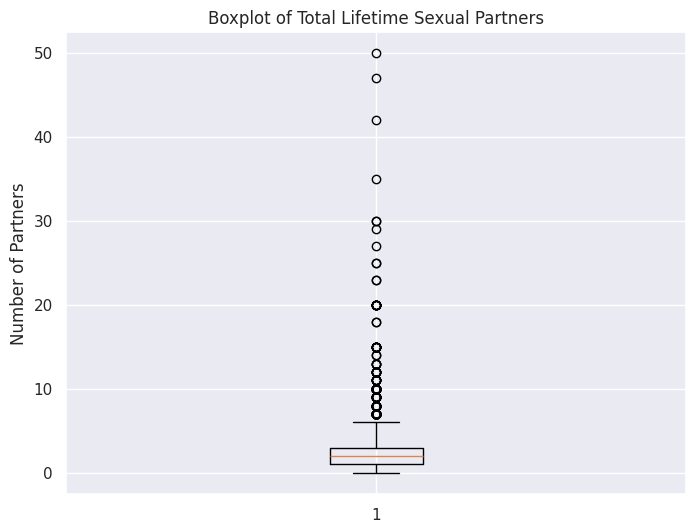

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace specific strings with 0
df['total_lifetime_sex_partners'] = df['total_lifetime_sex_partners'].replace({
    '95+': 0,
    "don't know": 0
})

# Convert the column to numeric (coerce any other invalid entries to 0)
df['total_lifetime_sex_partners'] = pd.to_numeric(
    df['total_lifetime_sex_partners'], errors='coerce'
).fillna(0)

# Plot the boxplot
plt.figure(figsize=(8,6))
plt.boxplot(df['total_lifetime_sex_partners'])
plt.title("Boxplot of Total Lifetime Sexual Partners")
plt.ylabel("Number of Partners")
plt.show()


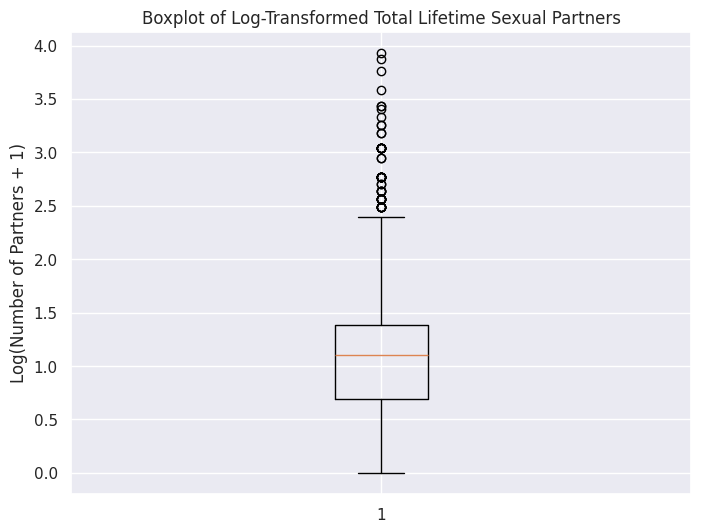

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace specific strings with 0
df['total_lifetime_sex_partners'] = df['total_lifetime_sex_partners'].replace({
    '95+': 0,
    "don't know": 0
})

# Convert the column to numeric (coerce any other invalid entries to 0)
df['total_lifetime_sex_partners'] = pd.to_numeric(
    df['total_lifetime_sex_partners'], errors='coerce'
).fillna(0)

# Apply log transformation (log(x + 1) to handle zeros)
df['total_lifetime_sex_partners'] = np.log1p(df['total_lifetime_sex_partners'])

# Plot the boxplot of log-transformed data
plt.figure(figsize=(8,6))
plt.boxplot(df['total_lifetime_sex_partners'])
plt.title("Boxplot of Log-Transformed Total Lifetime Sexual Partners")
plt.ylabel("Log(Number of Partners + 1)")
plt.show()


In [157]:
missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages_df = pd.DataFrame({"Missing Percentage": missing_percentages})

print("Percentage of missing values for each variable:")
print(missing_percentages_df)

Percentage of missing values for each variable:
                               Missing Percentage
v000                                          0.0
v001                                          0.0
v005                                          0.0
v007                                          0.0
respondent_age                                0.0
residence_type                                0.0
highest_edu_level                             0.0
sex_of_household_head                         0.0
age_of_household_head                         0.0
freq_read_newspaper                           0.0
freq_listen_radio                             0.0
freq_watch_tv                                 0.0
owns_mobile_phone                             0.0
wealth_index                                  0.0
current_contraceptive_method                  0.0
visited_health_facility_12mo                  0.0
smokes_cigarettes                             0.0
permission_to_medical_Vist                    0.0
mo

In [158]:
df.head()

,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_read_newspaper,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,0.794118,urban,primary,male,44,not at all,...,no,no,no,married,>20,no,no,no,yes,1.098612
1,ZM8,1,748300,2024,0.794118,urban,higher,female,41,at least once a week,...,yes,yes,yes,married,15-17,no,no,no,yes,1.386294
2,ZM8,1,748300,2024,0.264706,urban,primary,female,24,at least once a week,...,no,no,no,no longer living together/separated,15-17,no,yes,yes,yes,1.386294
3,ZM8,1,748300,2024,0.205882,urban,secondary,male,26,not at all,...,no,no,no,married,15-17,yes,no,no,yes,1.791759
4,ZM8,1,748300,2024,0.500000,urban,primary,female,32,at least once a week,...,no,no,yes,never in union,15-17,no,no,no,yes,1.386294


In [159]:
df = df.drop('freq_read_newspaper', axis=1)

In [160]:
df.columns

Index(['v000', 'v001', 'v005', 'v007', 'respondent_age', 'residence_type',
       'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_listen_radio', 'freq_watch_tv', 'owns_mobile_phone',
       'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [161]:
df.head()

,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,0.794118,urban,primary,male,44,No,...,no,no,no,married,>20,no,no,no,yes,1.098612
1,ZM8,1,748300,2024,0.794118,urban,higher,female,41,Yes,...,yes,yes,yes,married,15-17,no,no,no,yes,1.386294
2,ZM8,1,748300,2024,0.264706,urban,primary,female,24,No,...,no,no,no,no longer living together/separated,15-17,no,yes,yes,yes,1.386294
3,ZM8,1,748300,2024,0.205882,urban,secondary,male,26,No,...,no,no,no,married,15-17,yes,no,no,yes,1.791759
4,ZM8,1,748300,2024,0.500000,urban,primary,female,32,No,...,no,no,yes,never in union,15-17,no,no,no,yes,1.386294


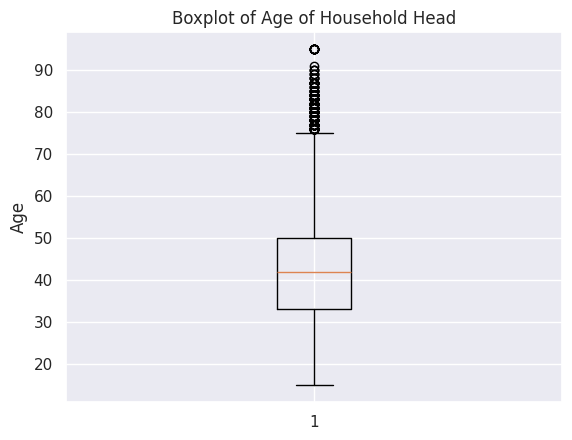

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to numeric, invalid entries become NaN
df['age_of_household_head'] = pd.to_numeric(df['age_of_household_head'], errors='coerce')

# Drop NaN values for plotting
ages = df['age_of_household_head'].dropna()

# Plot boxplot
plt.boxplot(ages)
plt.title("Boxplot of Age of Household Head")
plt.ylabel("Age")
plt.show()


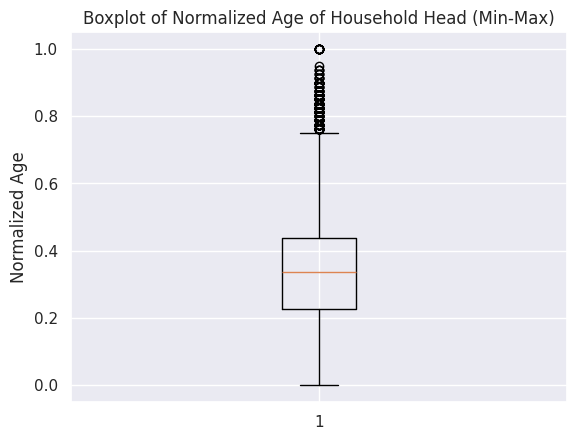

In [163]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to numeric, invalid entries become NaN
df['age_of_household_head'] = pd.to_numeric(df['age_of_household_head'], errors='coerce')

# Drop NaN values temporarily to compute min and max
ages = df['age_of_household_head'].dropna()

# Min-Max normalization
ages_normalized = (ages - ages.min()) / (ages.max() - ages.min())

# Replace the existing column with normalized values
df.loc[ages_normalized.index, 'age_of_household_head'] = ages_normalized

# Plot boxplot of normalized values
plt.boxplot(df['age_of_household_head'].dropna())
plt.title("Boxplot of Normalized Age of Household Head (Min-Max)")
plt.ylabel("Normalized Age")
plt.show()



In [164]:
df.head()

,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,0.794118,urban,primary,male,0.3625,No,...,no,no,no,married,>20,no,no,no,yes,1.098612
1,ZM8,1,748300,2024,0.794118,urban,higher,female,0.3250,Yes,...,yes,yes,yes,married,15-17,no,no,no,yes,1.386294
2,ZM8,1,748300,2024,0.264706,urban,primary,female,0.1125,No,...,no,no,no,no longer living together/separated,15-17,no,yes,yes,yes,1.386294
3,ZM8,1,748300,2024,0.205882,urban,secondary,male,0.1375,No,...,no,no,no,married,15-17,yes,no,no,yes,1.791759
4,ZM8,1,748300,2024,0.500000,urban,primary,female,0.2125,No,...,no,no,yes,never in union,15-17,no,no,no,yes,1.386294


In [165]:
print(df['marital_status'].value_counts(dropna=False))

marital_status
married                                7358
never in union                         4628
divorced                               1050
no longer living together/separated     453
widowed                                 363
living with partner                      99
Name: count, dtype: int64


In [166]:
df['marital_status'] = df['marital_status'].replace({
    'married': 'Married',
    'never in union': 'Single',
    'divorced': 'Divorced',
    'no longer living together/separated': 'Separated',
    'widowed': 'Widowed',
    'living with partner': 'Living with partner'
})

print("Value counts for 'marital_status' after renaming:")
print(df['marital_status'].value_counts(dropna=False))

Value counts for 'marital_status' after renaming:
marital_status
Married                7358
Single                 4628
Divorced               1050
Separated               453
Widowed                 363
Living with partner      99
Name: count, dtype: int64


In [167]:
df.columns

Index(['v000', 'v001', 'v005', 'v007', 'respondent_age', 'residence_type',
       'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_listen_radio', 'freq_watch_tv', 'owns_mobile_phone',
       'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [168]:
selected_columns = [
    'respondent_age', 'residence_type',
     'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_listen_radio', 'freq_watch_tv', 'owns_mobile_phone',
       'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'
]

df_selected = df[selected_columns]
display(df_selected.head())

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,urban,primary,male,0.3625,No,No,yes,richer,Non-Hormonal,...,no,no,no,Married,>20,no,no,no,yes,1.098612
1,0.794118,urban,higher,female,0.3250,Yes,Yes,yes,richest,Non-Hormonal,...,yes,yes,yes,Married,15-17,no,no,no,yes,1.386294
2,0.264706,urban,primary,female,0.1125,No,No,yes,richer,Hormonal,...,no,no,no,Separated,15-17,no,yes,yes,yes,1.386294
3,0.205882,urban,secondary,male,0.1375,No,No,yes,middle,Hormonal,...,no,no,no,Married,15-17,yes,no,no,yes,1.791759
4,0.500000,urban,primary,female,0.2125,No,No,yes,poorer,Hormonal,...,no,no,yes,Single,15-17,no,no,no,yes,1.386294


In [169]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'permission_to_medical_Vist',
       'money_needed_for_medical_vist', 'distance_to_health_facility',
       'transport_for_medical_visit', 'waiting_time_concern_at_HF',
       'covered_by_health_insurance', 'breast_exam_by_provider',
       'cervical_cancer_tested', 'marital_status', 'age_at_first_sex',
       'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [170]:
df_selected = df_selected[df_selected['cervical_cancer_tested'] != 'don\'t know']
print("Rows with 'don't know' in 'cervical_cancer_tested' have been removed.")
print(f"New shape of DataFrame: {df_selected.shape}")

Rows with 'don't know' in 'cervical_cancer_tested' have been removed.
New shape of DataFrame: (13909, 27)


In [171]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'permission_to_medical_Vist',
       'money_needed_for_medical_vist', 'distance_to_health_facility',
       'transport_for_medical_visit', 'waiting_time_concern_at_HF',
       'covered_by_health_insurance', 'breast_exam_by_provider',
       'cervical_cancer_tested', 'marital_status', 'age_at_first_sex',
       'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [172]:
df_selected = df_selected.drop(['genital_sore_last_12mo', 'genital_discharge_last_12mo', 'permission_to_medical_Vist', 'transport_for_medical_visit', 'money_needed_for_medical_vist'], axis=1)

In [173]:
df_selected.shape

(13909, 22)

In [174]:
df_selected.head()

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,distance_to_health_facility,waiting_time_concern_at_HF,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,urban,primary,male,0.3625,No,No,yes,richer,Non-Hormonal,...,not a big problem,not a big problem,no,no,no,Married,>20,no,yes,1.098612
1,0.794118,urban,higher,female,0.3250,Yes,Yes,yes,richest,Non-Hormonal,...,not a big problem,not a big problem,yes,yes,yes,Married,15-17,no,yes,1.386294
2,0.264706,urban,primary,female,0.1125,No,No,yes,richer,Hormonal,...,not a big problem,not a big problem,no,no,no,Separated,15-17,no,yes,1.386294
3,0.205882,urban,secondary,male,0.1375,No,No,yes,middle,Hormonal,...,not a big problem,not a big problem,no,no,no,Married,15-17,yes,yes,1.791759
4,0.500000,urban,primary,female,0.2125,No,No,yes,poorer,Hormonal,...,not a big problem,not a big problem,no,no,yes,Single,15-17,no,yes,1.386294


In [175]:
df_selected.dtypes

,0
respondent_age,float64
residence_type,category
highest_edu_level,category
sex_of_household_head,category
age_of_household_head,float64
freq_listen_radio,category
freq_watch_tv,category
owns_mobile_phone,category
wealth_index,category
current_contraceptive_method,category


In [176]:
for column in df_selected.columns:
    print(f"\nCategories in '{column}':")
    print(df_selected[column].unique())



Categories in 'respondent_age':
[0.79411765 0.26470588 0.20588235 0.5        0.61764706 0.32352941
 0.23529412 0.41176471 1.         0.11764706 0.05882353 0.97058824
 0.85294118 0.14705882 0.88235294 0.52941176 0.67647059 0.91176471
 0.02941176 0.08823529 0.55882353 0.82352941 0.17647059 0.76470588
 0.64705882 0.29411765 0.44117647 0.73529412 0.94117647 0.38235294
 0.35294118 0.47058824 0.         0.70588235 0.58823529]

Categories in 'residence_type':
['urban', 'rural']
Categories (2, object): ['urban' < 'rural']

Categories in 'highest_edu_level':
['primary', 'higher', 'secondary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Categories in 'sex_of_household_head':
['male', 'female']
Categories (2, object): ['male' < 'female']

Categories in 'age_of_household_head':
[0.3625 0.325  0.1125 0.1375 0.2125 0.2625 0.1    0.1875 0.55   0.3125
 0.475  0.6875 0.45   0.375  0.225  0.3875 0.6    0.625  0.275  0.125
 0.4625 0.0625 0.2375 0.0875 0

In [177]:
import pandas as pd
import numpy as np

# Replace "don't know" with NaN
df_selected = df_selected.replace("don't know", np.nan)

# Mode imputation for each column
for column in df_selected.columns:
    if df_selected[column].isnull().any():
        mode_value = df_selected[column].mode(dropna=True)[0]  # Get the most frequent value
        # Fix: Avoid inplace=True on a potentially read-only view by reassigning
        df_selected[column] = df_selected[column].fillna(mode_value)

# Optional: check the updated dataframe
print(df_selected.head())

   respondent_age residence_type highest_edu_level sex_of_household_head  \
0        0.794118          urban           primary                  male   
1        0.794118          urban            higher                female   
2        0.264706          urban           primary                female   
3        0.205882          urban         secondary                  male   
4        0.500000          urban           primary                female   

   age_of_household_head freq_listen_radio freq_watch_tv owns_mobile_phone  \
0                 0.3625                No            No               yes   
1                 0.3250               Yes           Yes               yes   
2                 0.1125                No            No               yes   
3                 0.1375                No            No               yes   
4                 0.2125                No            No               yes   

  wealth_index current_contraceptive_method  ... distance_to_health_facili

In [178]:
for column in df_selected.columns:
    print(f"\nCategories in '{column}':")
    print(df_selected[column].unique())


Categories in 'respondent_age':
[0.79411765 0.26470588 0.20588235 0.5        0.61764706 0.32352941
 0.23529412 0.41176471 1.         0.11764706 0.05882353 0.97058824
 0.85294118 0.14705882 0.88235294 0.52941176 0.67647059 0.91176471
 0.02941176 0.08823529 0.55882353 0.82352941 0.17647059 0.76470588
 0.64705882 0.29411765 0.44117647 0.73529412 0.94117647 0.38235294
 0.35294118 0.47058824 0.         0.70588235 0.58823529]

Categories in 'residence_type':
['urban', 'rural']
Categories (2, object): ['urban' < 'rural']

Categories in 'highest_edu_level':
['primary', 'higher', 'secondary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Categories in 'sex_of_household_head':
['male', 'female']
Categories (2, object): ['male' < 'female']

Categories in 'age_of_household_head':
[0.3625 0.325  0.1125 0.1375 0.2125 0.2625 0.1    0.1875 0.55   0.3125
 0.475  0.6875 0.45   0.375  0.225  0.3875 0.6    0.625  0.275  0.125
 0.4625 0.0625 0.2375 0.0875 0

In [179]:
df_selected.shape

(13909, 22)

In [180]:
df_selected.dtypes

,0
respondent_age,float64
residence_type,category
highest_edu_level,category
sex_of_household_head,category
age_of_household_head,float64
freq_listen_radio,category
freq_watch_tv,category
owns_mobile_phone,category
wealth_index,category
current_contraceptive_method,category


In [181]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'distance_to_health_facility',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [182]:
for column in df_selected.columns:
    print(f"\nCategories in '{column}':")
    print(df_selected[column].unique())


Categories in 'respondent_age':
[0.79411765 0.26470588 0.20588235 0.5        0.61764706 0.32352941
 0.23529412 0.41176471 1.         0.11764706 0.05882353 0.97058824
 0.85294118 0.14705882 0.88235294 0.52941176 0.67647059 0.91176471
 0.02941176 0.08823529 0.55882353 0.82352941 0.17647059 0.76470588
 0.64705882 0.29411765 0.44117647 0.73529412 0.94117647 0.38235294
 0.35294118 0.47058824 0.         0.70588235 0.58823529]

Categories in 'residence_type':
['urban', 'rural']
Categories (2, object): ['urban' < 'rural']

Categories in 'highest_edu_level':
['primary', 'higher', 'secondary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Categories in 'sex_of_household_head':
['male', 'female']
Categories (2, object): ['male' < 'female']

Categories in 'age_of_household_head':
[0.3625 0.325  0.1125 0.1375 0.2125 0.2625 0.1    0.1875 0.55   0.3125
 0.475  0.6875 0.45   0.375  0.225  0.3875 0.6    0.625  0.275  0.125
 0.4625 0.0625 0.2375 0.0875 0

In [183]:
df_selected.head()

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,distance_to_health_facility,waiting_time_concern_at_HF,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,urban,primary,male,0.3625,No,No,yes,richer,Non-Hormonal,...,not a big problem,not a big problem,no,no,no,Married,>20,no,yes,1.098612
1,0.794118,urban,higher,female,0.3250,Yes,Yes,yes,richest,Non-Hormonal,...,not a big problem,not a big problem,yes,yes,yes,Married,15-17,no,yes,1.386294
2,0.264706,urban,primary,female,0.1125,No,No,yes,richer,Hormonal,...,not a big problem,not a big problem,no,no,no,Separated,15-17,no,yes,1.386294
3,0.205882,urban,secondary,male,0.1375,No,No,yes,middle,Hormonal,...,not a big problem,not a big problem,no,no,no,Married,15-17,yes,yes,1.791759
4,0.500000,urban,primary,female,0.2125,No,No,yes,poorer,Hormonal,...,not a big problem,not a big problem,no,no,yes,Single,15-17,no,yes,1.386294


In [184]:
encoding_maps = {
    'residence_type': {
        'urban': 0,
        'rural': 1
    },

    'highest_edu_level': {
        'no education': 0,
        'primary': 1,
        'secondary': 2,
        'higher': 3
    },

    'sex_of_household_head': {
        'male': 1,
        'female': 0
    },

    'freq_listen_radio': {
        'No': 0,
        'Yes': 1
    },

    'freq_watch_tv': {
        'No': 0,
        'Yes': 1
    },

    'owns_mobile_phone': {
        'no': 0,
        'yes': 1
    },

    'wealth_index': {
        'poorest': 1,
        'poorer': 2,
        'middle': 3,
        'richer': 4,
        'richest': 5
    },

    'current_contraceptive_method': {
        'Non-Hormonal': 0,
        'Hormonal': 1
    },

    'visited_health_facility_12mo': {
        'yes': 1,
        'no': 0
    },

    'smokes_cigarettes': {
        'no': 0,
        'yes': 1
    },

    'distance_to_health_facility': {
        'not a big problem': 0,
        'big problem': 1
    },

    'waiting_time_concern_at_HF': {
        'not a big problem': 0,
        'big problem': 1
    },

    'covered_by_health_insurance': {
        'no': 0,
        'yes': 1
    },

    'breast_exam_by_provider': {
        'no': 0,
        'yes': 1
    },

    'cervical_cancer_tested': {
        'no': 0,
        'yes': 1
    },

    'marital_status': {
        'Single': 1,
        'Married': 3,
        'Living with partner': 2,
        'Widowed': 6,
        'Divorced': 5,
        'Separated': 4
    },

    'age_at_first_sex': {
        'not had sex': 1,
        '<15': 2,
        '15-17': 3,
        '18-19': 4,
        '>20': 5
    },

    'STI_last_12mo': {
        'no': 0,
        'yes': 1
    },

    'ever_tested_hiv': {
        'yes': 1,
        'no': 0
    }
}


In [185]:
for col, mapping in encoding_maps.items():
    if col in df_selected.columns:
        df_selected[col] = df_selected[col].map(mapping)

        # Check unmapped values
        unmatched = set(df_selected[col].isna().index)


In [186]:
df_selected.head()

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,distance_to_health_facility,waiting_time_concern_at_HF,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,0,1,1,0.3625,0,0,1,4,0,...,0,0,0,0,0,3,5,0,1,1.098612
1,0.794118,0,3,0,0.3250,1,1,1,5,0,...,0,0,1,1,1,3,3,0,1,1.386294
2,0.264706,0,1,0,0.1125,0,0,1,4,1,...,0,0,0,0,0,4,3,0,1,1.386294
3,0.205882,0,2,1,0.1375,0,0,1,3,1,...,0,0,0,0,0,3,3,1,1,1.791759
4,0.500000,0,1,0,0.2125,0,0,1,2,1,...,0,0,0,0,1,1,3,0,1,1.386294


In [187]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'distance_to_health_facility',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [188]:
rename_map = {
    'respondent_age': 'age',
    'residence_type': 'residence',
    'highest_edu_level': 'education_level',
    'sex_of_household_head': 'household_head_sex',
    'age_of_household_head': 'household_head_age',
    'freq_listen_radio': 'listen_radio',
    'freq_watch_tv': 'watch_tv',
    'owns_mobile_phone': 'mobile_phone',
    'wealth_index': 'wealth_index',
    'current_contraceptive_method': 'contraceptive_method',
    'visited_health_facility_12mo': 'visited_health_facility_12mo',
    'smokes_cigarettes': 'smokes_cigarettes',
    'distance_to_health_facility': 'distance_to_Helth_facility',
    'waiting_time_concern_at_HF': 'facility_waiting_time',
    'covered_by_health_insurance': 'health_insurance',
    'breast_exam_by_provider': 'breast_exam',
    'cervical_cancer_tested': 'cervical_cancer_screened',
    'marital_status': 'marital_status',
    'age_at_first_sex': 'age_first_sex',
    'STI_last_12mo': 'STI_last12mo',
    'ever_tested_hiv': 'ever_tested_hiv',
    'total_lifetime_sex_partners': 'lifetime_sex_partners'
}

df_selected = df_selected.rename(columns=rename_map)


In [189]:
df_selected.head()

,age,residence,education_level,household_head_sex,household_head_age,listen_radio,watch_tv,mobile_phone,wealth_index,contraceptive_method,...,distance_to_Helth_facility,facility_waiting_time,health_insurance,breast_exam,cervical_cancer_screened,marital_status,age_first_sex,STI_last12mo,ever_tested_hiv,lifetime_sex_partners
0,0.794118,0,1,1,0.3625,0,0,1,4,0,...,0,0,0,0,0,3,5,0,1,1.098612
1,0.794118,0,3,0,0.3250,1,1,1,5,0,...,0,0,1,1,1,3,3,0,1,1.386294
2,0.264706,0,1,0,0.1125,0,0,1,4,1,...,0,0,0,0,0,4,3,0,1,1.386294
3,0.205882,0,2,1,0.1375,0,0,1,3,1,...,0,0,0,0,0,3,3,1,1,1.791759
4,0.500000,0,1,0,0.2125,0,0,1,2,1,...,0,0,0,0,1,1,3,0,1,1.386294


In [190]:
df_selected.isna().sum()

,0
age,0
residence,0
education_level,0
household_head_sex,0
household_head_age,0
listen_radio,0
watch_tv,0
mobile_phone,0
wealth_index,0
contraceptive_method,0


In [191]:
df_selected.dtypes

,0
age,float64
residence,category
education_level,category
household_head_sex,category
household_head_age,float64
listen_radio,category
watch_tv,category
mobile_phone,category
wealth_index,category
contraceptive_method,category


In [192]:
import pandas as pd

# Convert all columns to numeric, invalid parsing will be set as NaN
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Check the result
print(df_selected.dtypes)


age                             float64
residence                         int64
education_level                   int64
household_head_sex                int64
household_head_age              float64
listen_radio                      int64
watch_tv                          int64
mobile_phone                      int64
wealth_index                      int64
contraceptive_method              int64
visited_health_facility_12mo      int64
smokes_cigarettes                 int64
distance_to_Helth_facility        int64
facility_waiting_time             int64
health_insurance                  int64
breast_exam                       int64
cervical_cancer_screened          int64
marital_status                    int64
age_first_sex                     int64
STI_last12mo                      int64
ever_tested_hiv                   int64
lifetime_sex_partners           float64
dtype: object


In [193]:
df_selected.columns

Index(['age', 'residence', 'education_level', 'household_head_sex',
       'household_head_age', 'listen_radio', 'watch_tv', 'mobile_phone',
       'wealth_index', 'contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'distance_to_Helth_facility',
       'facility_waiting_time', 'health_insurance', 'breast_exam',
       'cervical_cancer_screened', 'marital_status', 'age_first_sex',
       'STI_last12mo', 'ever_tested_hiv', 'lifetime_sex_partners'],
      dtype='object')

In [194]:
# --- Define target and features ---
y = df_selected["cervical_cancer_screened"]
X = df_selected.drop(columns=["cervical_cancer_screened"])

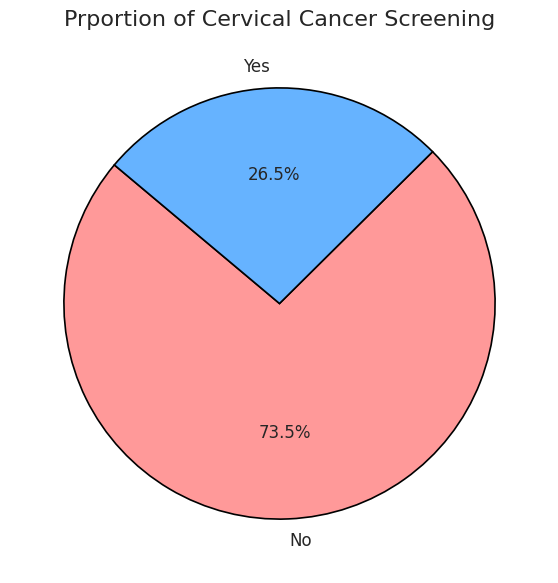

In [195]:
import matplotlib.pyplot as plt

# Map 0/1 to No/Yes
y_mapped = df_selected["cervical_cancer_screened"].map({0: "No", 1: "Yes"})

# Calculate counts
counts = y_mapped.value_counts()
labels = counts.index
sizes = counts.values
colors = ['#ff9999','#66b3ff']  # Nice color palette

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotation
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},  # Black border for wedges
    textprops={'fontsize': 12}
)
plt.title("Prportion of Cervical Cancer Screening", fontsize=16)
plt.show()


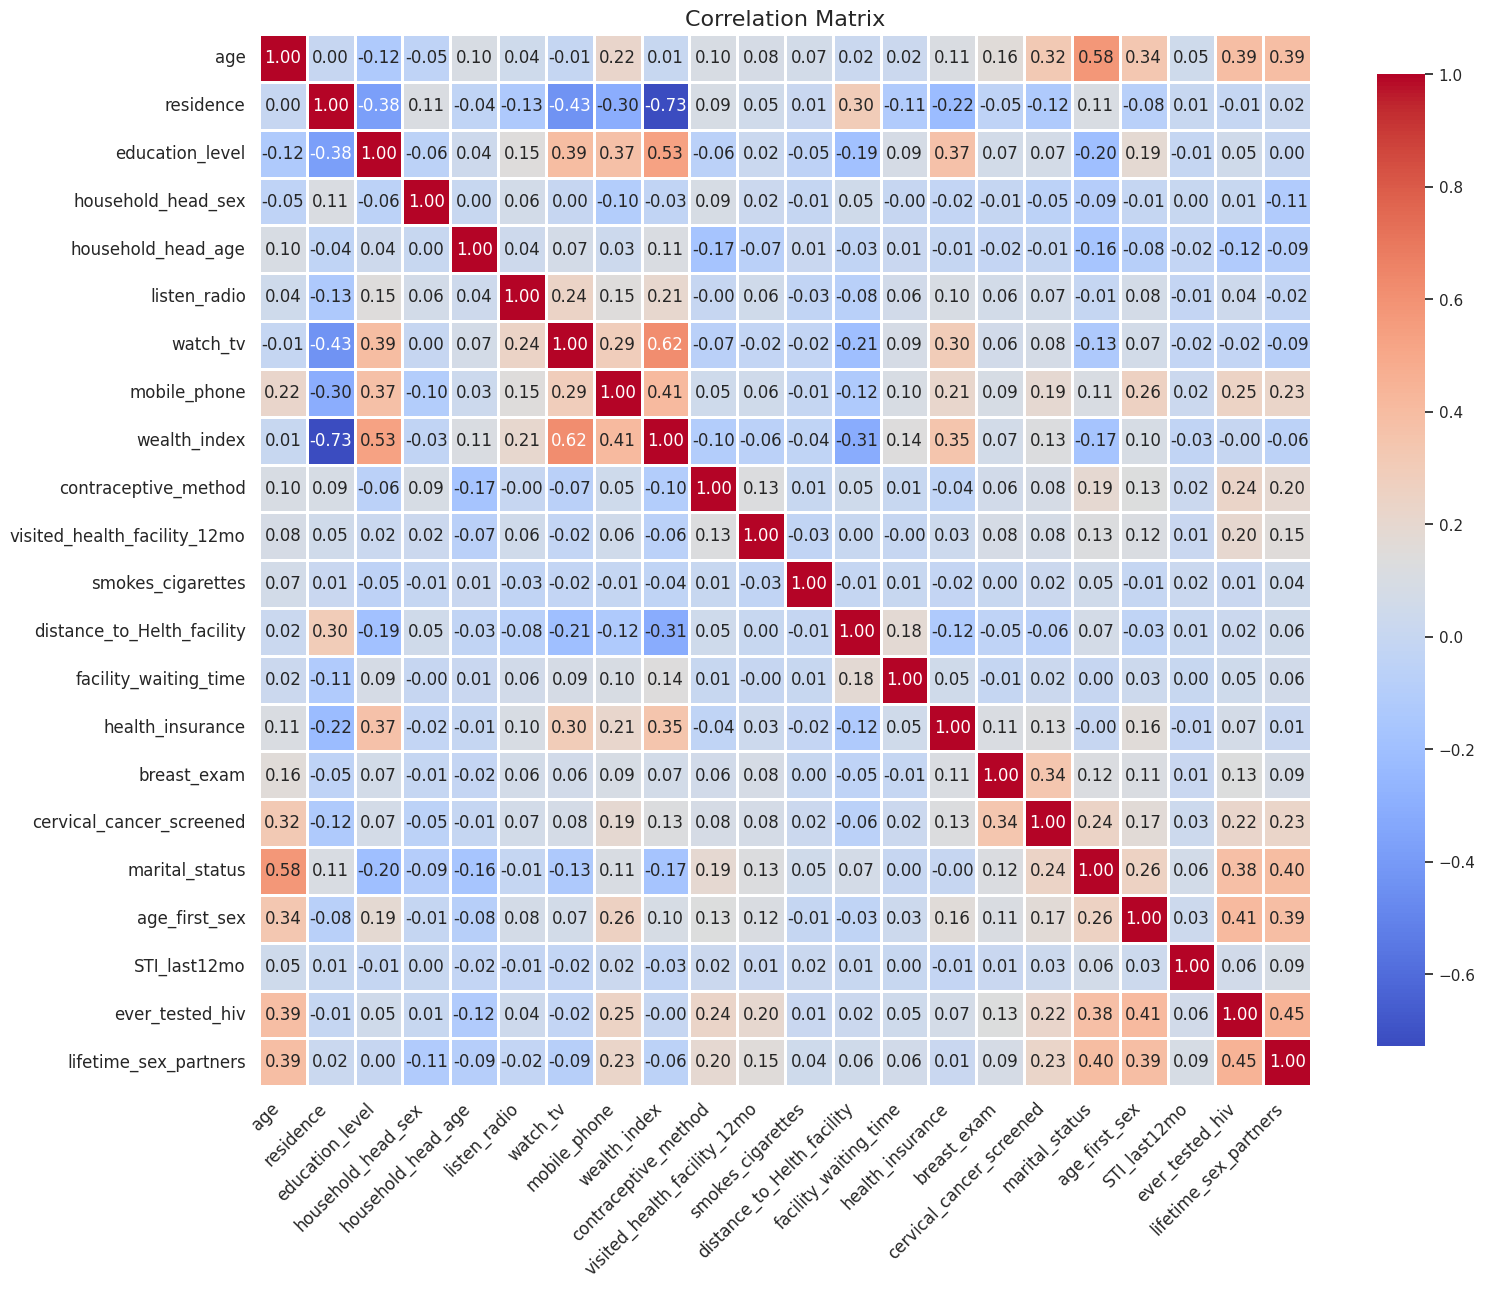

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = df_selected.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(16, 14))  # Increased figure size
sns.set(font_scale=1)       # Increase font scale for better readability
sns.heatmap(
    corr_matrix,
    annot=True,                # Show correlation values
    fmt=".2f",                 # Format
    cmap="coolwarm",           # Color map
    linewidths=1,              # Line width between cells
    cbar_kws={'shrink': 0.8}, # Colorbar size
    square=True
)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [197]:
#df_selected=df_selected.drop(['residence'],axis=1) # have higher correlation with wealth index

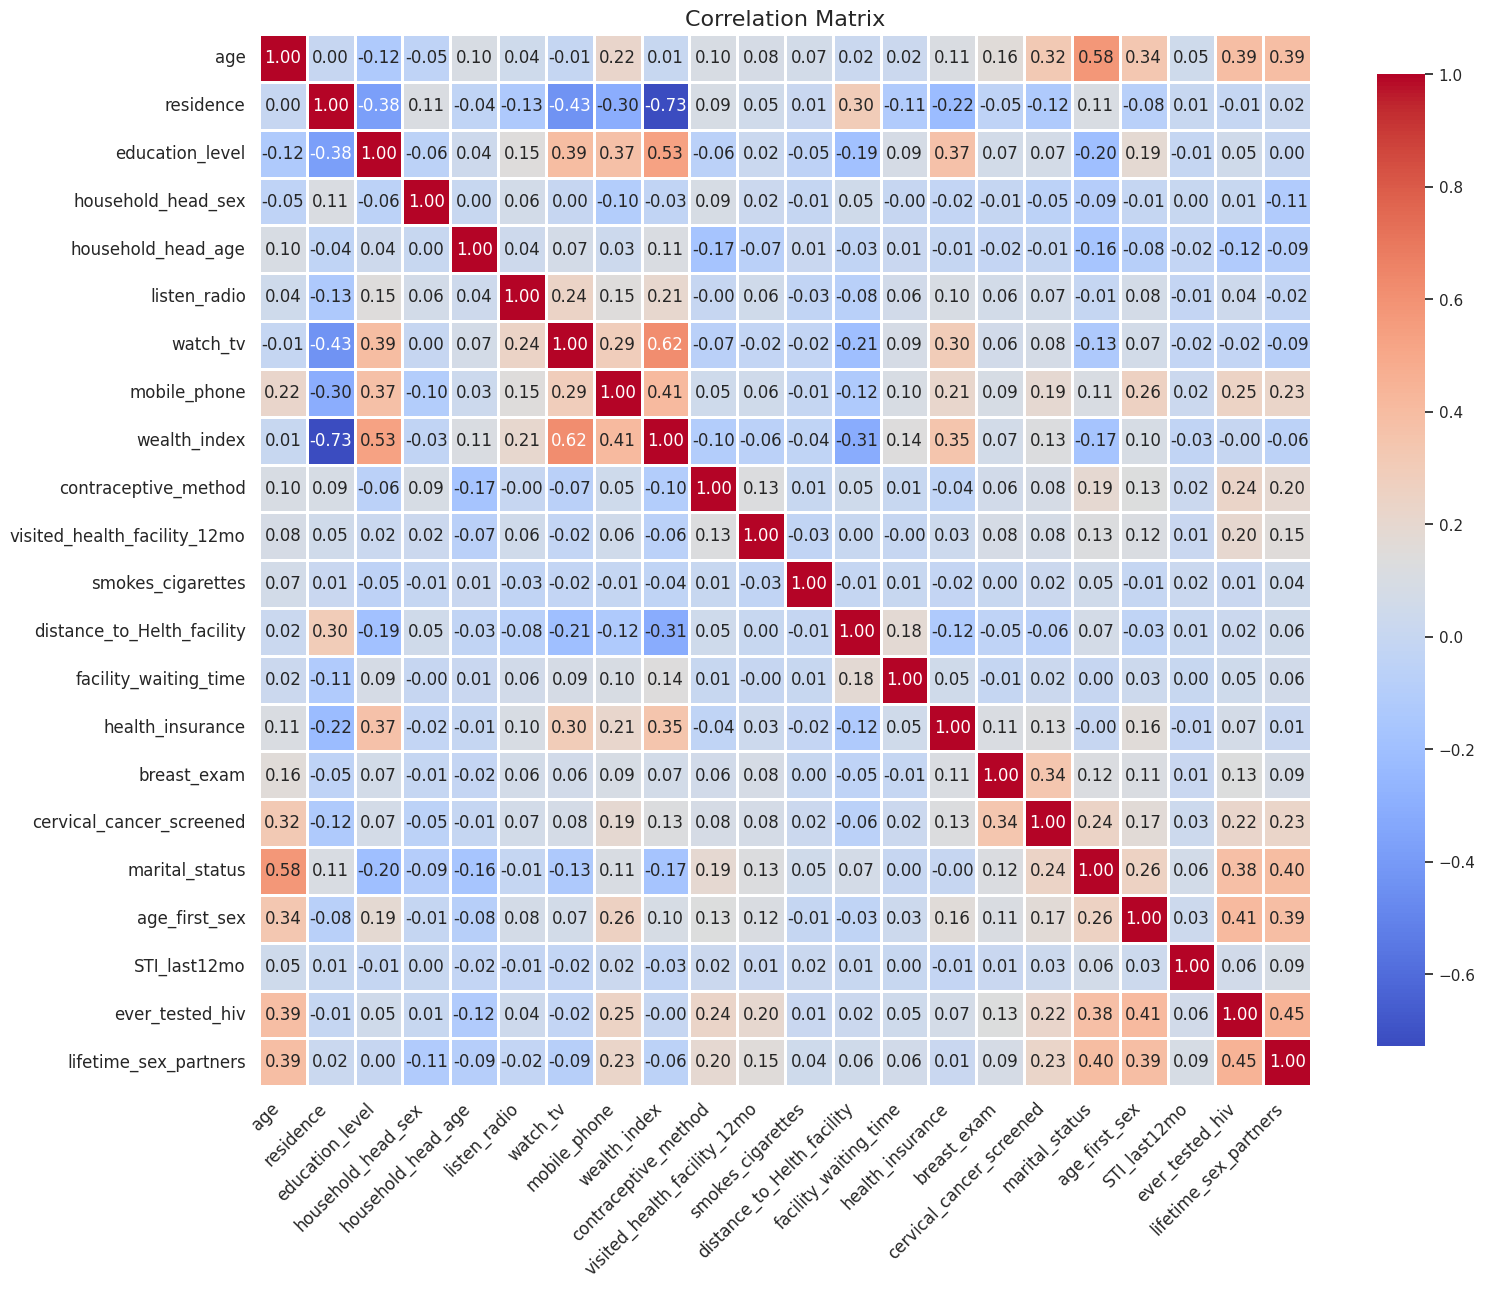

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = df_selected.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(16, 14))  # Increased figure size
sns.set(font_scale=1)       # Increase font scale for better readability
sns.heatmap(
    corr_matrix,
    annot=True,                # Show correlation values
    fmt=".2f",                 # Format
    cmap="coolwarm",           # Color map
    linewidths=1,              # Line width between cells
    cbar_kws={'shrink': 0.8}, # Colorbar size
    square=True
)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [199]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains the target
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% for testing
    random_state=42,     # for reproducibility
    stratify=y           # keeps class distribution same in train and test
)

# Check the shape
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train: (11127, 21)
X_test: (2782, 21)
y_train distribution:
 cervical_cancer_screened
0    8183
1    2944
Name: count, dtype: int64
y_test distribution:
 cervical_cancer_screened
0    2046
1     736
Name: count, dtype: int64


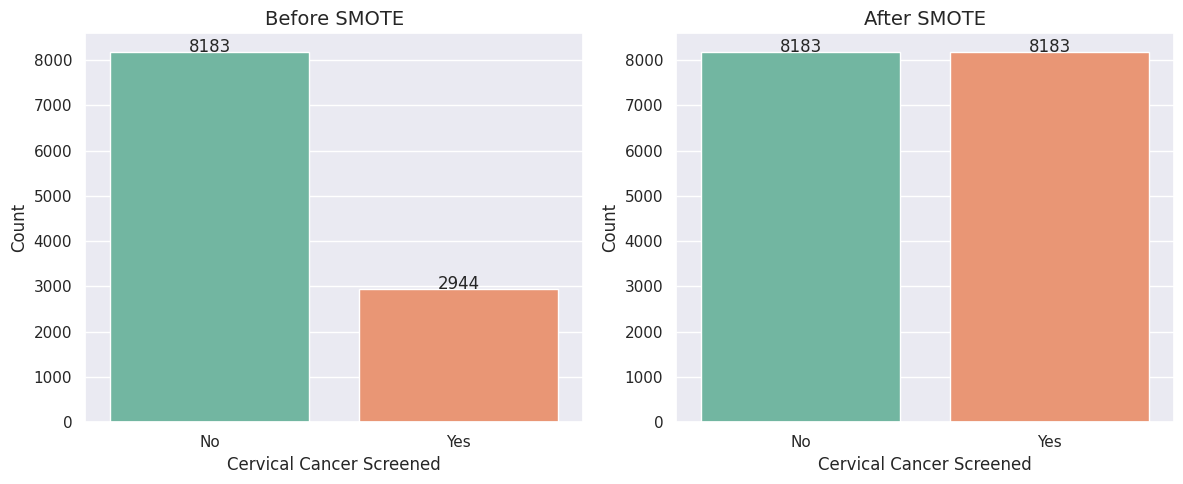

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pandas as pd

# ensure using training set only
y_train_mapped = y_train.map({0: "No", 1: "Yes"})

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

y_train_res_mapped = pd.Series(y_train_res).map({0: "No", 1: "Yes"})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
order = ["No", "Yes"]  # explicit category order used for both plots

# Before SMOTE
sns.countplot(x=y_train_mapped, order=order, palette="Set2", ax=axes[0])
axes[0].set_title("Before SMOTE", fontsize=14)
axes[0].set_xlabel("Cervical Cancer Screened", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# Annotate counts by reading bar heights (robust)
for p in axes[0].patches:
    height = int(p.get_height())
    axes[0].text(p.get_x() + p.get_width() / 2., height + 5, str(height),
                 ha="center", fontsize=12)

# After SMOTE
sns.countplot(x=y_train_res_mapped, order=order, palette="Set2", ax=axes[1])
axes[1].set_title("After SMOTE", fontsize=14)
axes[1].set_xlabel("Cervical Cancer Screened", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

for p in axes[1].patches:
    height = int(p.get_height())
    axes[1].text(p.get_x() + p.get_width() / 2., height + 5, str(height),
                 ha="center", fontsize=12)

plt.tight_layout()
plt.show()


Feature Ranking (1 = most important):
                         Feature  Rank  Selected
0                            age     1      True
1                      residence     1      True
2                education_level     1      True
4             household_head_age     1      True
15                   breast_exam     1      True
8                   wealth_index     1      True
17                 age_first_sex     1      True
16                marital_status     1      True
20         lifetime_sex_partners     1      True
19               ever_tested_hiv     1      True
9           contraceptive_method     2     False
5                   listen_radio     3     False
10  visited_health_facility_12mo     4     False
7                   mobile_phone     5     False
13         facility_waiting_time     6     False
12    distance_to_Helth_facility     7     False
3             household_head_sex     8     False
6                       watch_tv     9     False
14              health_insuranc

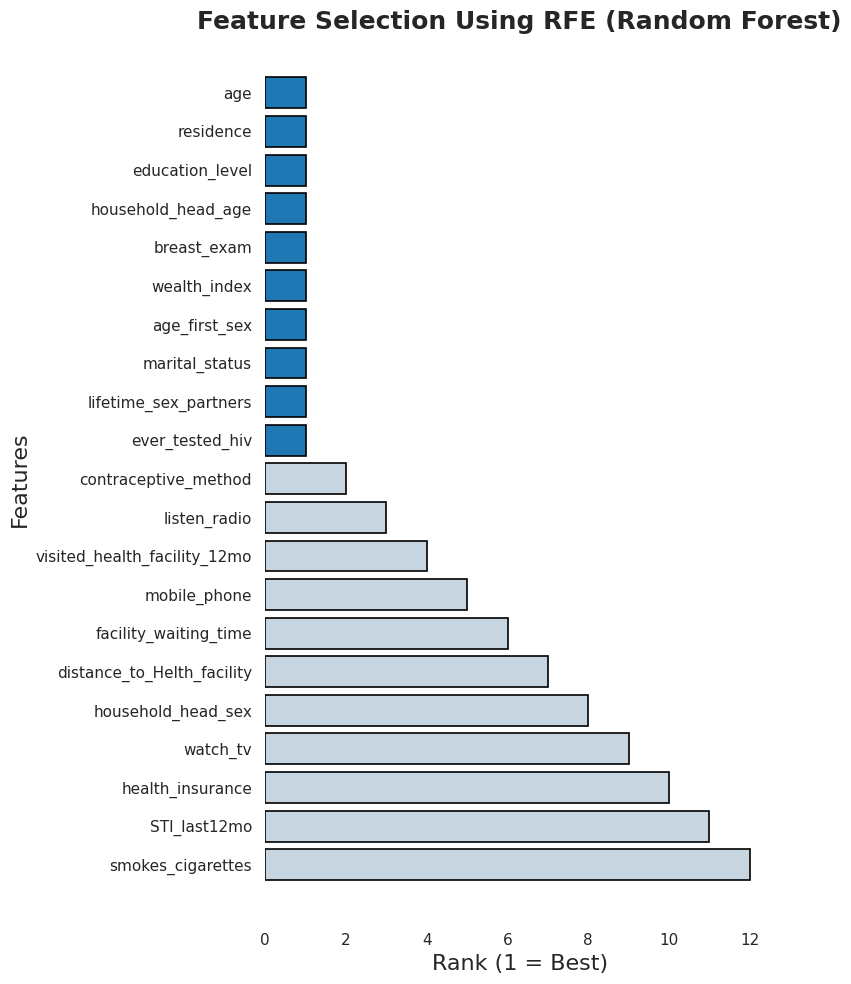


Top Selected Features:
                  Feature  Rank  Selected
0                     age     1      True
1               residence     1      True
2         education_level     1      True
4      household_head_age     1      True
15            breast_exam     1      True
8            wealth_index     1      True
17          age_first_sex     1      True
16         marital_status     1      True
20  lifetime_sex_partners     1      True
19        ever_tested_hiv     1      True


In [201]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------------
# 1. Random Forest Classifier
# -------------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight=None
)

# -------------------------------------------------------
# 2. Apply RFE
# -------------------------------------------------------
n_features_to_select = 10

rfe = RFE(
    estimator=rf,
    n_features_to_select=n_features_to_select,
    step=1
)

rfe.fit(X_train_res, y_train_res)

# -------------------------------------------------------
# 3. Build Ranking Table
# -------------------------------------------------------
ranking_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Rank": rfe.ranking_,
    "Selected": rfe.support_
}).sort_values(by="Rank", ascending=True)

print("Feature Ranking (1 = most important):")
print(ranking_df)

# -------------------------------------------------------
# 4. Clean Publication-Quality Plot (No Rank Labels)
# -------------------------------------------------------

plt.figure(figsize=(8, 10))

sorted_df = ranking_df.sort_values("Rank")

# Colors for selected vs non-selected features
colors = ["#1f77b4" if sel else "#c7d5e0" for sel in sorted_df["Selected"]]

plt.barh(
    y=sorted_df["Feature"],
    width=sorted_df["Rank"],
    color=colors,
    edgecolor="black",
    linewidth=1.2
)

# Invert y-axis so top-ranked features appear on top
plt.gca().invert_yaxis()

# Labels and title
plt.title("Feature Selection Using RFE (Random Forest)",
          fontsize=18, fontweight="bold")
plt.xlabel("Rank (1 = Best)", fontsize=16)
plt.ylabel("Features", fontsize=16)

# Grid lines
plt.grid(axis='x', linestyle="--", alpha=0.6)

# Remove outer box
plt.box(False)

plt.tight_layout()

# Save the figure high quality
plt.savefig("RFE_feature_ranking_clean.png", dpi=300, bbox_inches='tight')

plt.show()

# -------------------------------------------------------
# 5. Show only the selected features (Rank = 1)
# -------------------------------------------------------
print("\nTop Selected Features:")
print(ranking_df[ranking_df["Rank"] == 1])


In [202]:
!pip install optuna

In [203]:
!pip install catboost

[I 2025-12-09 11:57:24,262] A new study created in memory with name: no-name-ff1194e3-e89b-4f56-be3c-81703f4afb05


Selected features (RFE): ['age', 'residence', 'education_level', 'household_head_age', 'breast_exam', 'wealth_index', 'age_first_sex', 'marital_status', 'lifetime_sex_partners', 'ever_tested_hiv']

Checking NaN before cleaning:
Train NaN: 0
Test NaN : 0

Checking NaN AFTER cleaning:
Train NaN: 0
Test NaN : 0
NaN fix complete ✔

Starting optimization for DecisionTree...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 11:57:24,430] Trial 0 finished with value: 0.6547671224871435 and parameters: {'max_depth': 29, 'min_samples_split': 8}. Best is trial 0 with value: 0.6547671224871435.
[I 2025-12-09 11:57:24,520] Trial 1 finished with value: 0.6900749474053296 and parameters: {'max_depth': 17, 'min_samples_split': 6}. Best is trial 1 with value: 0.6900749474053296.
[I 2025-12-09 11:57:24,601] Trial 2 finished with value: 0.7597745069913724 and parameters: {'max_depth': 12, 'min_samples_split': 4}. Best is trial 2 with value: 0.7597745069913724.
[I 2025-12-09 11:57:24,732] Trial 3 finished with value: 0.6669558709464916 and parameters: {'max_depth': 24, 'min_samples_split': 10}. Best is trial 2 with value: 0.7597745069913724.
[I 2025-12-09 11:57:24,861] Trial 4 finished with value: 0.6783334528666751 and parameters: {'max_depth': 19, 'min_samples_split': 7}. Best is trial 2 with value: 0.7597745069913724.
[I 2025-12-09 11:57:24,968] Trial 5 finished with value: 0.7414204943899018 and para

[I 2025-12-09 11:57:28,482] A new study created in memory with name: no-name-085eacf7-a619-424e-aa4c-32e548686e3b


[I 2025-12-09 11:57:28,343] Trial 38 finished with value: 0.6823892855624973 and parameters: {'max_depth': 18, 'min_samples_split': 7}. Best is trial 20 with value: 0.800071188745803.
[I 2025-12-09 11:57:28,474] Trial 39 finished with value: 0.788918063878618 and parameters: {'max_depth': 8, 'min_samples_split': 5}. Best is trial 20 with value: 0.800071188745803.
Best DecisionTree ROC-AUC: 0.8001
Best Params: {'max_depth': 6, 'min_samples_split': 5}

Starting optimization for RandomForest...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 11:57:36,832] Trial 0 finished with value: 0.8095750855327468 and parameters: {'n_estimators': 260, 'max_depth': 9, 'min_samples_split': 9}. Best is trial 0 with value: 0.8095750855327468.
[I 2025-12-09 11:57:48,290] Trial 1 finished with value: 0.7949554937523906 and parameters: {'n_estimators': 258, 'max_depth': 19, 'min_samples_split': 8}. Best is trial 0 with value: 0.8095750855327468.
[I 2025-12-09 11:57:54,582] Trial 2 finished with value: 0.8020756964809383 and parameters: {'n_estimators': 351, 'max_depth': 3, 'min_samples_split': 2}. Best is trial 0 with value: 0.8095750855327468.
[I 2025-12-09 11:58:00,445] Trial 3 finished with value: 0.7926345546984573 and parameters: {'n_estimators': 166, 'max_depth': 19, 'min_samples_split': 6}. Best is trial 0 with value: 0.8095750855327468.
[I 2025-12-09 11:58:22,395] Trial 4 finished with value: 0.7842702091036593 and parameters: {'n_estimators': 509, 'max_depth': 24, 'min_samples_split': 4}. Best is trial 0 with value: 0.

[I 2025-12-09 12:01:59,977] A new study created in memory with name: no-name-1b5bdd9f-3ce1-4b69-9d16-ff650477aba5


[I 2025-12-09 12:01:59,970] Trial 39 finished with value: 0.8089837275277316 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_samples_split': 4}. Best is trial 27 with value: 0.8105486181945685.
Best RandomForest ROC-AUC: 0.8105
Best Params: {'n_estimators': 600, 'max_depth': 8, 'min_samples_split': 5}

Starting optimization for ExtraTrees...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 12:02:01,813] Trial 0 finished with value: 0.8144972029198011 and parameters: {'n_estimators': 236, 'max_depth': 8}. Best is trial 0 with value: 0.8144972029198011.
[I 2025-12-09 12:02:06,454] Trial 1 finished with value: 0.7968740038888179 and parameters: {'n_estimators': 457, 'max_depth': 17}. Best is trial 0 with value: 0.8144972029198011.
[I 2025-12-09 12:02:09,159] Trial 2 finished with value: 0.7749017834374601 and parameters: {'n_estimators': 192, 'max_depth': 23}. Best is trial 0 with value: 0.8144972029198011.
[I 2025-12-09 12:02:11,219] Trial 3 finished with value: 0.8113856836244635 and parameters: {'n_estimators': 334, 'max_depth': 4}. Best is trial 0 with value: 0.8144972029198011.
[I 2025-12-09 12:02:15,002] Trial 4 finished with value: 0.7779694738407922 and parameters: {'n_estimators': 175, 'max_depth': 22}. Best is trial 0 with value: 0.8144972029198011.
[I 2025-12-09 12:02:18,126] Trial 5 finished with value: 0.8142236043818267 and parameters: {'n_estima

[I 2025-12-09 12:04:18,314] A new study created in memory with name: no-name-318fc683-43ec-4143-a046-692dc528e125


[I 2025-12-09 12:04:18,309] Trial 39 finished with value: 0.7684851672404267 and parameters: {'n_estimators': 573, 'max_depth': 26}. Best is trial 0 with value: 0.8144972029198011.
Best ExtraTrees ROC-AUC: 0.8145
Best Params: {'n_estimators': 236, 'max_depth': 8}

Starting optimization for AdaBoost...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 12:04:19,957] Trial 0 finished with value: 0.7975553439372688 and parameters: {'n_estimators': 143, 'learning_rate': 0.9493845948638463}. Best is trial 0 with value: 0.7975553439372688.
[I 2025-12-09 12:04:21,932] Trial 1 finished with value: 0.7977964028432998 and parameters: {'n_estimators': 139, 'learning_rate': 0.8382075210971721}. Best is trial 1 with value: 0.7977964028432998.
[I 2025-12-09 12:04:27,304] Trial 2 finished with value: 0.7986175304942836 and parameters: {'n_estimators': 399, 'learning_rate': 0.7967539904958018}. Best is trial 2 with value: 0.7986175304942836.
[I 2025-12-09 12:04:31,308] Trial 3 finished with value: 0.7993785594372901 and parameters: {'n_estimators': 351, 'learning_rate': 0.8019892183015594}. Best is trial 3 with value: 0.7993785594372901.
[I 2025-12-09 12:04:32,937] Trial 4 finished with value: 0.7982210782438693 and parameters: {'n_estimators': 135, 'learning_rate': 0.18084108477132158}. Best is trial 3 with value: 0.7993785594372901.

[I 2025-12-09 12:06:43,259] A new study created in memory with name: no-name-be8b82e5-714b-4be6-b498-6661d4cd7ef6


[I 2025-12-09 12:06:43,254] Trial 39 finished with value: 0.7993838720302605 and parameters: {'n_estimators': 112, 'learning_rate': 0.4585709778755581}. Best is trial 22 with value: 0.8006539137872413.
Best AdaBoost ROC-AUC: 0.8007
Best Params: {'n_estimators': 312, 'learning_rate': 0.3000049744981614}

Starting optimization for GradientBoosting...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 12:06:57,018] Trial 0 finished with value: 0.7816912772536021 and parameters: {'n_estimators': 371, 'learning_rate': 0.15919889895767547, 'max_depth': 5}. Best is trial 0 with value: 0.7816912772536021.
[I 2025-12-09 12:07:09,944] Trial 1 finished with value: 0.7477006433550086 and parameters: {'n_estimators': 130, 'learning_rate': 0.21176541769191481, 'max_depth': 10}. Best is trial 0 with value: 0.7816912772536021.
[I 2025-12-09 12:07:15,318] Trial 2 finished with value: 0.8057872067448679 and parameters: {'n_estimators': 297, 'learning_rate': 0.029697546761456396, 'max_depth': 2}. Best is trial 2 with value: 0.8057872067448679.
[I 2025-12-09 12:07:48,301] Trial 3 finished with value: 0.73602356400612 and parameters: {'n_estimators': 398, 'learning_rate': 0.2997971609669804, 'max_depth': 9}. Best is trial 2 with value: 0.8057872067448679.
[I 2025-12-09 12:07:58,547] Trial 4 finished with value: 0.7651159871860257 and parameters: {'n_estimators': 185, 'learning_rate': 0.

[I 2025-12-09 12:11:55,436] A new study created in memory with name: no-name-2658a5a8-6b16-4ac6-8d2e-033db21f363f


[I 2025-12-09 12:11:55,426] Trial 39 finished with value: 0.8070286933146329 and parameters: {'n_estimators': 321, 'learning_rate': 0.23749264385171287, 'max_depth': 2}. Best is trial 30 with value: 0.8098692703684814.
Best GradientBoosting ROC-AUC: 0.8099
Best Params: {'n_estimators': 251, 'learning_rate': 0.2515081685821378, 'max_depth': 2}

Starting optimization for Bagging...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 12:12:10,355] Trial 0 finished with value: 0.7529315552084661 and parameters: {'n_estimators': 187}. Best is trial 0 with value: 0.7529315552084661.
[I 2025-12-09 12:12:19,109] Trial 1 finished with value: 0.7530564011432701 and parameters: {'n_estimators': 144}. Best is trial 1 with value: 0.7530564011432701.
[I 2025-12-09 12:12:21,512] Trial 2 finished with value: 0.7546418781078669 and parameters: {'n_estimators': 53}. Best is trial 2 with value: 0.7546418781078669.
[I 2025-12-09 12:12:29,998] Trial 3 finished with value: 0.7532386894895661 and parameters: {'n_estimators': 180}. Best is trial 2 with value: 0.7546418781078669.
[I 2025-12-09 12:12:40,379] Trial 4 finished with value: 0.7557727963364358 and parameters: {'n_estimators': 192}. Best is trial 4 with value: 0.7557727963364358.
[I 2025-12-09 12:12:44,377] Trial 5 finished with value: 0.7526792070423732 and parameters: {'n_estimators': 89}. Best is trial 4 with value: 0.7557727963364358.
[I 2025-12-09 12:12:55,0

[I 2025-12-09 12:16:43,883] A new study created in memory with name: no-name-7ed0ef0c-10c6-46aa-979a-ed863b200ed1


[I 2025-12-09 12:16:43,876] Trial 39 finished with value: 0.7531978489311064 and parameters: {'n_estimators': 185}. Best is trial 26 with value: 0.7572135051425901.
Best Bagging ROC-AUC: 0.7572
Best Params: {'n_estimators': 177}

Starting optimization for LogisticRegression...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 12:16:43,970] Trial 0 finished with value: 0.8047399618555825 and parameters: {'C': 0.0025735235302663533}. Best is trial 0 with value: 0.8047399618555825.
[I 2025-12-09 12:16:44,010] Trial 1 finished with value: 0.8032902880487908 and parameters: {'C': 0.013555237839355897}. Best is trial 0 with value: 0.8047399618555825.
[I 2025-12-09 12:16:44,062] Trial 2 finished with value: 0.80257308799779 and parameters: {'C': 35.06084653164914}. Best is trial 0 with value: 0.8047399618555825.
[I 2025-12-09 12:16:44,121] Trial 3 finished with value: 0.8032896239746695 and parameters: {'C': 0.01363884165074177}. Best is trial 0 with value: 0.8047399618555825.
[I 2025-12-09 12:16:44,189] Trial 4 finished with value: 0.8042385858940032 and parameters: {'C': 0.004070570236449774}. Best is trial 0 with value: 0.8047399618555825.
[I 2025-12-09 12:16:44,231] Trial 5 finished with value: 0.8025770724425177 and parameters: {'C': 2.2317925406326022}. Best is trial 0 with value: 0.80473996185

[I 2025-12-09 12:16:45,883] A new study created in memory with name: no-name-7aaff5b3-3717-4f84-afe7-c167c1ac3143


[I 2025-12-09 12:16:45,787] Trial 37 finished with value: 0.8048050411194696 and parameters: {'C': 0.0024852831603129934}. Best is trial 19 with value: 0.8063516697479705.
[I 2025-12-09 12:16:45,824] Trial 38 finished with value: 0.8034277513918994 and parameters: {'C': 0.01034169102424405}. Best is trial 19 with value: 0.8063516697479705.
[I 2025-12-09 12:16:45,870] Trial 39 finished with value: 0.8060674460240556 and parameters: {'C': 0.0008419279318431666}. Best is trial 19 with value: 0.8063516697479705.
Best LogisticRegression ROC-AUC: 0.8064
Best Params: {'C': 0.0004952924338236491}

Starting optimization for KNN...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 12:16:46,380] Trial 0 finished with value: 0.7917191285222491 and parameters: {'n_neighbors': 28}. Best is trial 0 with value: 0.7917191285222491.
[I 2025-12-09 12:16:46,742] Trial 1 finished with value: 0.7797707748948106 and parameters: {'n_neighbors': 16}. Best is trial 0 with value: 0.7917191285222491.
[I 2025-12-09 12:16:47,006] Trial 2 finished with value: 0.7680150027625484 and parameters: {'n_neighbors': 9}. Best is trial 0 with value: 0.7917191285222491.
[I 2025-12-09 12:16:47,271] Trial 3 finished with value: 0.7680150027625484 and parameters: {'n_neighbors': 9}. Best is trial 0 with value: 0.7917191285222491.
[I 2025-12-09 12:16:47,513] Trial 4 finished with value: 0.7617524517616558 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 0.7917191285222491.
[I 2025-12-09 12:16:47,861] Trial 5 finished with value: 0.7851447947214076 and parameters: {'n_neighbors': 20}. Best is trial 0 with value: 0.7917191285222491.
[I 2025-12-09 12:16:48,168] Trial 6 f

[I 2025-12-09 12:17:02,242] A new study created in memory with name: no-name-417eef4a-955c-43c6-96f0-0d83eb460daf


[I 2025-12-09 12:17:02,235] Trial 39 finished with value: 0.7891318957456755 and parameters: {'n_neighbors': 23}. Best is trial 12 with value: 0.7928361011942708.
Best KNN ROC-AUC: 0.7928
Best Params: {'n_neighbors': 30}

Starting optimization for XGBoost...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 12:17:02,928] Trial 0 finished with value: 0.8082588906243359 and parameters: {'n_estimators': 725, 'max_depth': 8, 'learning_rate': 0.1253632032369077, 'subsample': 0.516634419982219, 'colsample_bytree': 0.4651143639599837, 'gamma': 4.913880858632867}. Best is trial 0 with value: 0.8082588906243359.
[I 2025-12-09 12:17:03,253] Trial 1 finished with value: 0.7817145198478473 and parameters: {'n_estimators': 178, 'max_depth': 7, 'learning_rate': 0.272841211252976, 'subsample': 0.7096658856488764, 'colsample_bytree': 0.4231507369307047, 'gamma': 0.33662637289833597}. Best is trial 0 with value: 0.8082588906243359.
[I 2025-12-09 12:17:04,104] Trial 2 finished with value: 0.7916736394449404 and parameters: {'n_estimators': 791, 'max_depth': 6, 'learning_rate': 0.12492598499817842, 'subsample': 0.7094598549307068, 'colsample_bytree': 0.8463352904006886, 'gamma': 1.487439250533319}. Best is trial 0 with value: 0.8082588906243359.
[I 2025-12-09 12:17:04,611] Trial 3 finished wit

[I 2025-12-09 12:17:26,395] A new study created in memory with name: no-name-d0bd8eec-e912-4b03-b901-1f2c90214410


[I 2025-12-09 12:17:26,380] Trial 39 finished with value: 0.793639962918101 and parameters: {'n_estimators': 331, 'max_depth': 6, 'learning_rate': 0.1463546901744554, 'subsample': 0.8194885168885169, 'colsample_bytree': 0.5477098705357029, 'gamma': 0.37234823557716124}. Best is trial 20 with value: 0.8094934044158273.
Best XGBoost ROC-AUC: 0.8095
Best Params: {'n_estimators': 390, 'max_depth': 4, 'learning_rate': 0.020093962645370965, 'subsample': 0.6698700922592781, 'colsample_bytree': 0.5386836761321232, 'gamma': 1.2320812355972057}

Starting optimization for LightGBM...


  0%|          | 0/40 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[I 2025-12-09 12:18:13,644] A new study created in memory with name: no-name-dc14413d-fb99-43c9-8c3f-a97ed073bdb5


[I 2025-12-09 12:18:13,632] Trial 39 finished with value: 0.7459043228569 and parameters: {'n_estimators': 755, 'max_depth': 5, 'learning_rate': 0.29542459538805876, 'subsample': 0.6920407735452226, 'colsample_bytree': 0.7873898633787488}. Best is trial 16 with value: 0.8105891267159676.
Best LightGBM ROC-AUC: 0.8106
Best Params: {'n_estimators': 633, 'max_depth': 3, 'learning_rate': 0.13733649254761485, 'subsample': 0.739473995480579, 'colsample_bytree': 0.4118729290232575}

Starting optimization for CatBoost...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-12-09 12:18:17,709] Trial 0 finished with value: 0.7872681717242551 and parameters: {'iterations': 700, 'depth': 5, 'learning_rate': 0.2030037439067185}. Best is trial 0 with value: 0.7872681717242551.
[I 2025-12-09 12:18:25,190] Trial 1 finished with value: 0.8015311557014748 and parameters: {'iterations': 906, 'depth': 4, 'learning_rate': 0.11513701555067012}. Best is trial 1 with value: 0.8015311557014748.
[I 2025-12-09 12:18:28,432] Trial 2 finished with value: 0.8095810621998385 and parameters: {'iterations': 723, 'depth': 3, 'learning_rate': 0.018762119152078822}. Best is trial 2 with value: 0.8095810621998385.
[I 2025-12-09 12:18:45,679] Trial 3 finished with value: 0.7576903103616813 and parameters: {'iterations': 735, 'depth': 9, 'learning_rate': 0.15531003724429845}. Best is trial 2 with value: 0.8095810621998385.
[I 2025-12-09 12:19:11,616] Trial 4 finished with value: 0.7969689664881635 and parameters: {'iterations': 747, 'depth': 10, 'learning_rate': 0.036033020850

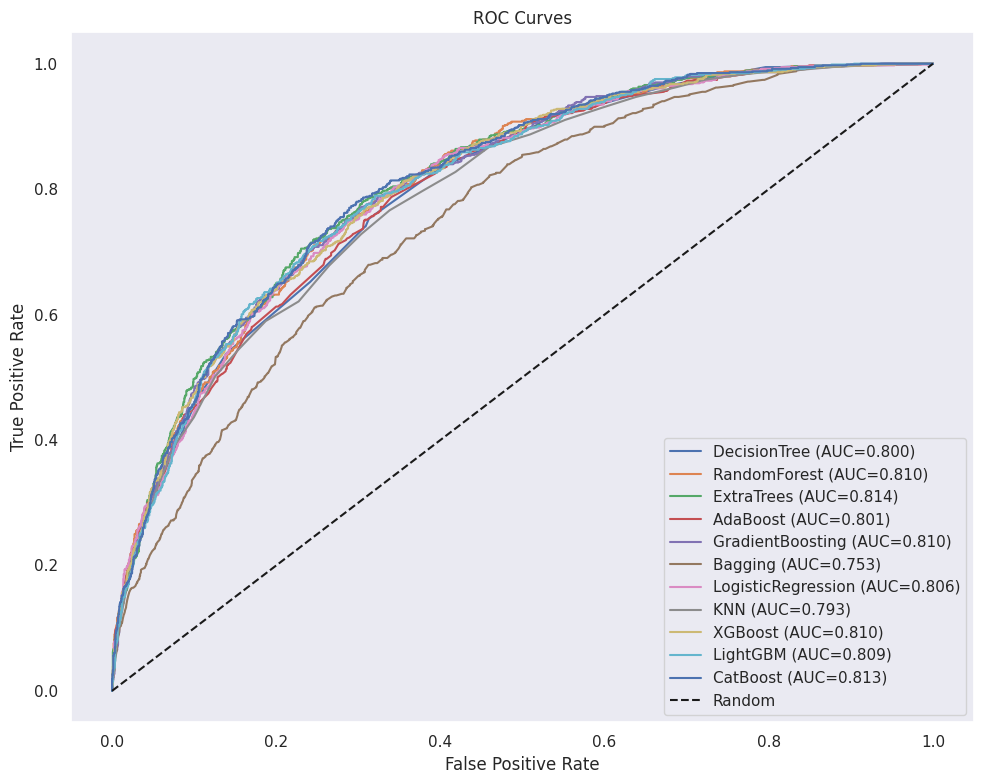


Model Performance Summary:
                 Model   ROC_AUC    PR_AUC  Accuracy  Precision    Recall  \
0           ExtraTrees  0.814211  0.618924  0.738318   0.503788  0.722826   
1             CatBoost  0.813297  0.616451  0.785406   0.642127  0.426630   
2         RandomForest  0.810306  0.615496  0.728613   0.491356  0.733696   
3     GradientBoosting  0.809869  0.605432  0.788641   0.638577  0.463315   
4              XGBoost  0.809542  0.614198  0.774623   0.572185  0.586957   
5             LightGBM  0.808741  0.603032  0.783249   0.648770  0.394022   
6   LogisticRegression  0.806352  0.609199  0.712078   0.472527  0.759511   
7             AdaBoost  0.800654  0.598459  0.705607   0.464439  0.736413   
8         DecisionTree  0.800071  0.578526  0.704170   0.463042  0.740489   
9                  KNN  0.792836  0.573328  0.689432   0.449045  0.766304   
10             Bagging  0.752806  0.524463  0.736880   0.502841  0.480978   

          F1  
0   0.593750  
1   0.512653  
2 

In [204]:
# ======================================================
# Full pipeline: Optuna + Final Models + Evaluation + ROC
# Revised with new model list (DT, RF, ET, AdaBoost, GBoost, Bagging, KNN…)
# ======================================================

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML libraries
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    AdaBoostClassifier, GradientBoostingClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, confusion_matrix,
    classification_report
)


# ======================================================
# 0. RFE-selected features
# ======================================================
selected_features = ranking_df[ranking_df["Selected"] == True]["Feature"].tolist()
print("Selected features (RFE):", selected_features)

X_train_sel = X_train_res[selected_features].copy()
X_test_sel  = X_test[selected_features].copy()

assert X_train_sel.shape[1] == len(selected_features)


# ======================================================
# FIX NaN ISSUE
# ======================================================
print("\nChecking NaN before cleaning:")
print("Train NaN:", X_train_sel.isna().sum().sum())
print("Test NaN :", X_test_sel.isna().sum().sum())

# Fill numeric
for col in X_train_sel.select_dtypes(include=[np.number]).columns:
    med = X_train_sel[col].median()
    X_train_sel[col].fillna(med, inplace=True)
    X_test_sel[col].fillna(med, inplace=True)

# Fill categorical
for col in X_train_sel.select_dtypes(include=['object']).columns:
    X_train_sel[col].fillna("Unknown", inplace=True)
    X_test_sel[col].fillna("Unknown", inplace=True)

print("\nChecking NaN AFTER cleaning:")
print("Train NaN:", X_train_sel.isna().sum().sum())
print("Test NaN :", X_test_sel.isna().sum().sum())
print("NaN fix complete ✔")


# ======================================================
# Evaluation function
# ======================================================
def evaluate_model(name, model, X_test, y_test):
    try:
        probs = model.predict_proba(X_test)[:, 1]
    except:
        try:
            scores = model.decision_function(X_test)
            probs = (scores - scores.min()) / (scores.max() - scores.min())
        except:
            probs = model.predict(X_test)

    preds = (probs >= 0.5).astype(int)

    return {
        "model": name,
        "roc_auc": roc_auc_score(y_test, probs),
        "pr_auc": average_precision_score(y_test, probs),
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, zero_division=0),
        "recall": recall_score(y_test, preds, zero_division=0),
        "f1": f1_score(y_test, preds, zero_division=0),
        "confusion_matrix": confusion_matrix(y_test, preds),
        "probs": probs
    }


# ======================================================
# 1. Optuna Objective Functions
# ======================================================

def optimize_decisiontree(trial):
    params = {
        "max_depth": trial.suggest_int("max_depth", 2, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10)
    }
    model = DecisionTreeClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 600),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10)
    }
    model = RandomForestClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_extratrees(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 600),
        "max_depth": trial.suggest_int("max_depth", 3, 30)
    }
    model = ExtraTreesClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_adaboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 400),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0)
    }
    model = AdaBoostClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_gboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 400),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 2, 10)
    }
    model = GradientBoostingClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_bagging(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 200)
    }
    model = BaggingClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_logistic(trial):
    C = trial.suggest_float("C", 1e-4, 100.0, log=True)
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(C=C, max_iter=5000))
    ])
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_knn(trial):
    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 3, 30)
    }
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(**params))
    ])
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "random_state": 42
    }
    model = XGBClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "random_state": 42
    }
    model = LGBMClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_cat(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000),
        "depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "random_state": 42,
        "verbose": 0
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


# ======================================================
# 2. Run Optuna Studies
# ======================================================
n_trials = 40

def run_search(func, name):
    print(f"\nStarting optimization for {name}...")
    study = optuna.create_study(direction="maximize")
    study.optimize(func, n_trials=n_trials, show_progress_bar=True)
    print(f"Best {name} ROC-AUC: {study.best_value:.4f}")
    print("Best Params:", study.best_params)
    return study.best_params


best_dt_params     = run_search(optimize_decisiontree, "DecisionTree")
best_rf_params     = run_search(optimize_rf, "RandomForest")
best_et_params     = run_search(optimize_extratrees, "ExtraTrees")
best_ada_params    = run_search(optimize_adaboost, "AdaBoost")
best_gb_params     = run_search(optimize_gboost, "GradientBoosting")
best_bag_params    = run_search(optimize_bagging, "Bagging")
best_lr_params     = run_search(optimize_logistic, "LogisticRegression")
best_knn_params    = run_search(optimize_knn, "KNN")
best_xgb_params    = run_search(optimize_xgb, "XGBoost")
best_lgbm_params   = run_search(optimize_lgbm, "LightGBM")
best_cat_params    = run_search(optimize_cat, "CatBoost")


# ======================================================
# 3. Train final models
# ======================================================
final_models = {}

final_models["DecisionTree"] = DecisionTreeClassifier(**best_dt_params).fit(X_train_sel, y_train_res)
final_models["RandomForest"] = RandomForestClassifier(**best_rf_params, n_jobs=-1).fit(X_train_sel, y_train_res)
final_models["ExtraTrees"] = ExtraTreesClassifier(**best_et_params, n_jobs=-1).fit(X_train_sel, y_train_res)
final_models["AdaBoost"] = AdaBoostClassifier(**best_ada_params).fit(X_train_sel, y_train_res)
final_models["GradientBoosting"] = GradientBoostingClassifier(**best_gb_params).fit(X_train_sel, y_train_res)
final_models["Bagging"] = BaggingClassifier(**best_bag_params, n_jobs=-1).fit(X_train_sel, y_train_res)

final_models["LogisticRegression"] = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(C=best_lr_params["C"], max_iter=5000))
]).fit(X_train_sel, y_train_res)

final_models["KNN"] = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(**best_knn_params))
]).fit(X_train_sel, y_train_res)

final_models["XGBoost"] = XGBClassifier(**best_xgb_params, n_jobs=-1).fit(X_train_sel, y_train_res)
final_models["LightGBM"] = LGBMClassifier(**best_lgbm_params, n_jobs=-1).fit(X_train_sel, y_train_res)

cat_params = best_cat_params.copy()
cat_params.update({"random_state": 42, "verbose": 0})
final_models["CatBoost"] = CatBoostClassifier(**cat_params).fit(X_train_sel, y_train_res)


# ======================================================
# 4. Evaluate models + ROC curves
# ======================================================
results = []
plt.figure(figsize=(10, 8))

for name, model in final_models.items():
    res = evaluate_model(name, model, X_test_sel, y_test)
    results.append(res)
    fpr, tpr, _ = roc_curve(y_test, res["probs"])
    plt.plot(fpr, tpr, label=f"{name} (AUC={res['roc_auc']:.3f})")

plt.plot([0,1], [0,1], "k--", label="Random")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# ======================================================
# 5. Summary table + Top 2 confusion matrices
# ======================================================
summary = pd.DataFrame([{
    "Model": r["model"],
    "ROC_AUC": r["roc_auc"],
    "PR_AUC": r["pr_auc"],
    "Accuracy": r["accuracy"],
    "Precision": r["precision"],
    "Recall": r["recall"],
    "F1": r["f1"]
} for r in results]).sort_values("ROC_AUC", ascending=False).reset_index(drop=True)

print("\nModel Performance Summary:")
print(summary)

top_models = summary["Model"].head(2).tolist()

for tm in top_models:
    print(f"\n--- {tm} ---")
    model_obj = final_models[tm]
    try:
        probs = model_obj.predict_proba(X_test_sel)[:, 1]
        preds = (probs >= 0.5).astype(int)
    except:
        preds = model_obj.predict(X_test_sel)

    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))


summary.to_csv("model_performance_summary.csv", index=False)
print("\nSaved summary to model_performance_summary.csv")


High-quality bar plot of TOPSIS **scores**

In [205]:
!pip install topsis



TOPSIS ranking of models:
                    TOPSIS_score  Rank
Model                                 
ExtraTrees              0.675363     1
RandomForest            0.658411     2
LogisticRegression      0.639201     3
DecisionTree            0.604887     4
AdaBoost                0.604321     5
XGBoost                 0.602575     6
KNN                     0.596135     7
GradientBoosting        0.474698     8
CatBoost                0.432010     9
LightGBM                0.404007    10
Bagging                 0.238407    11


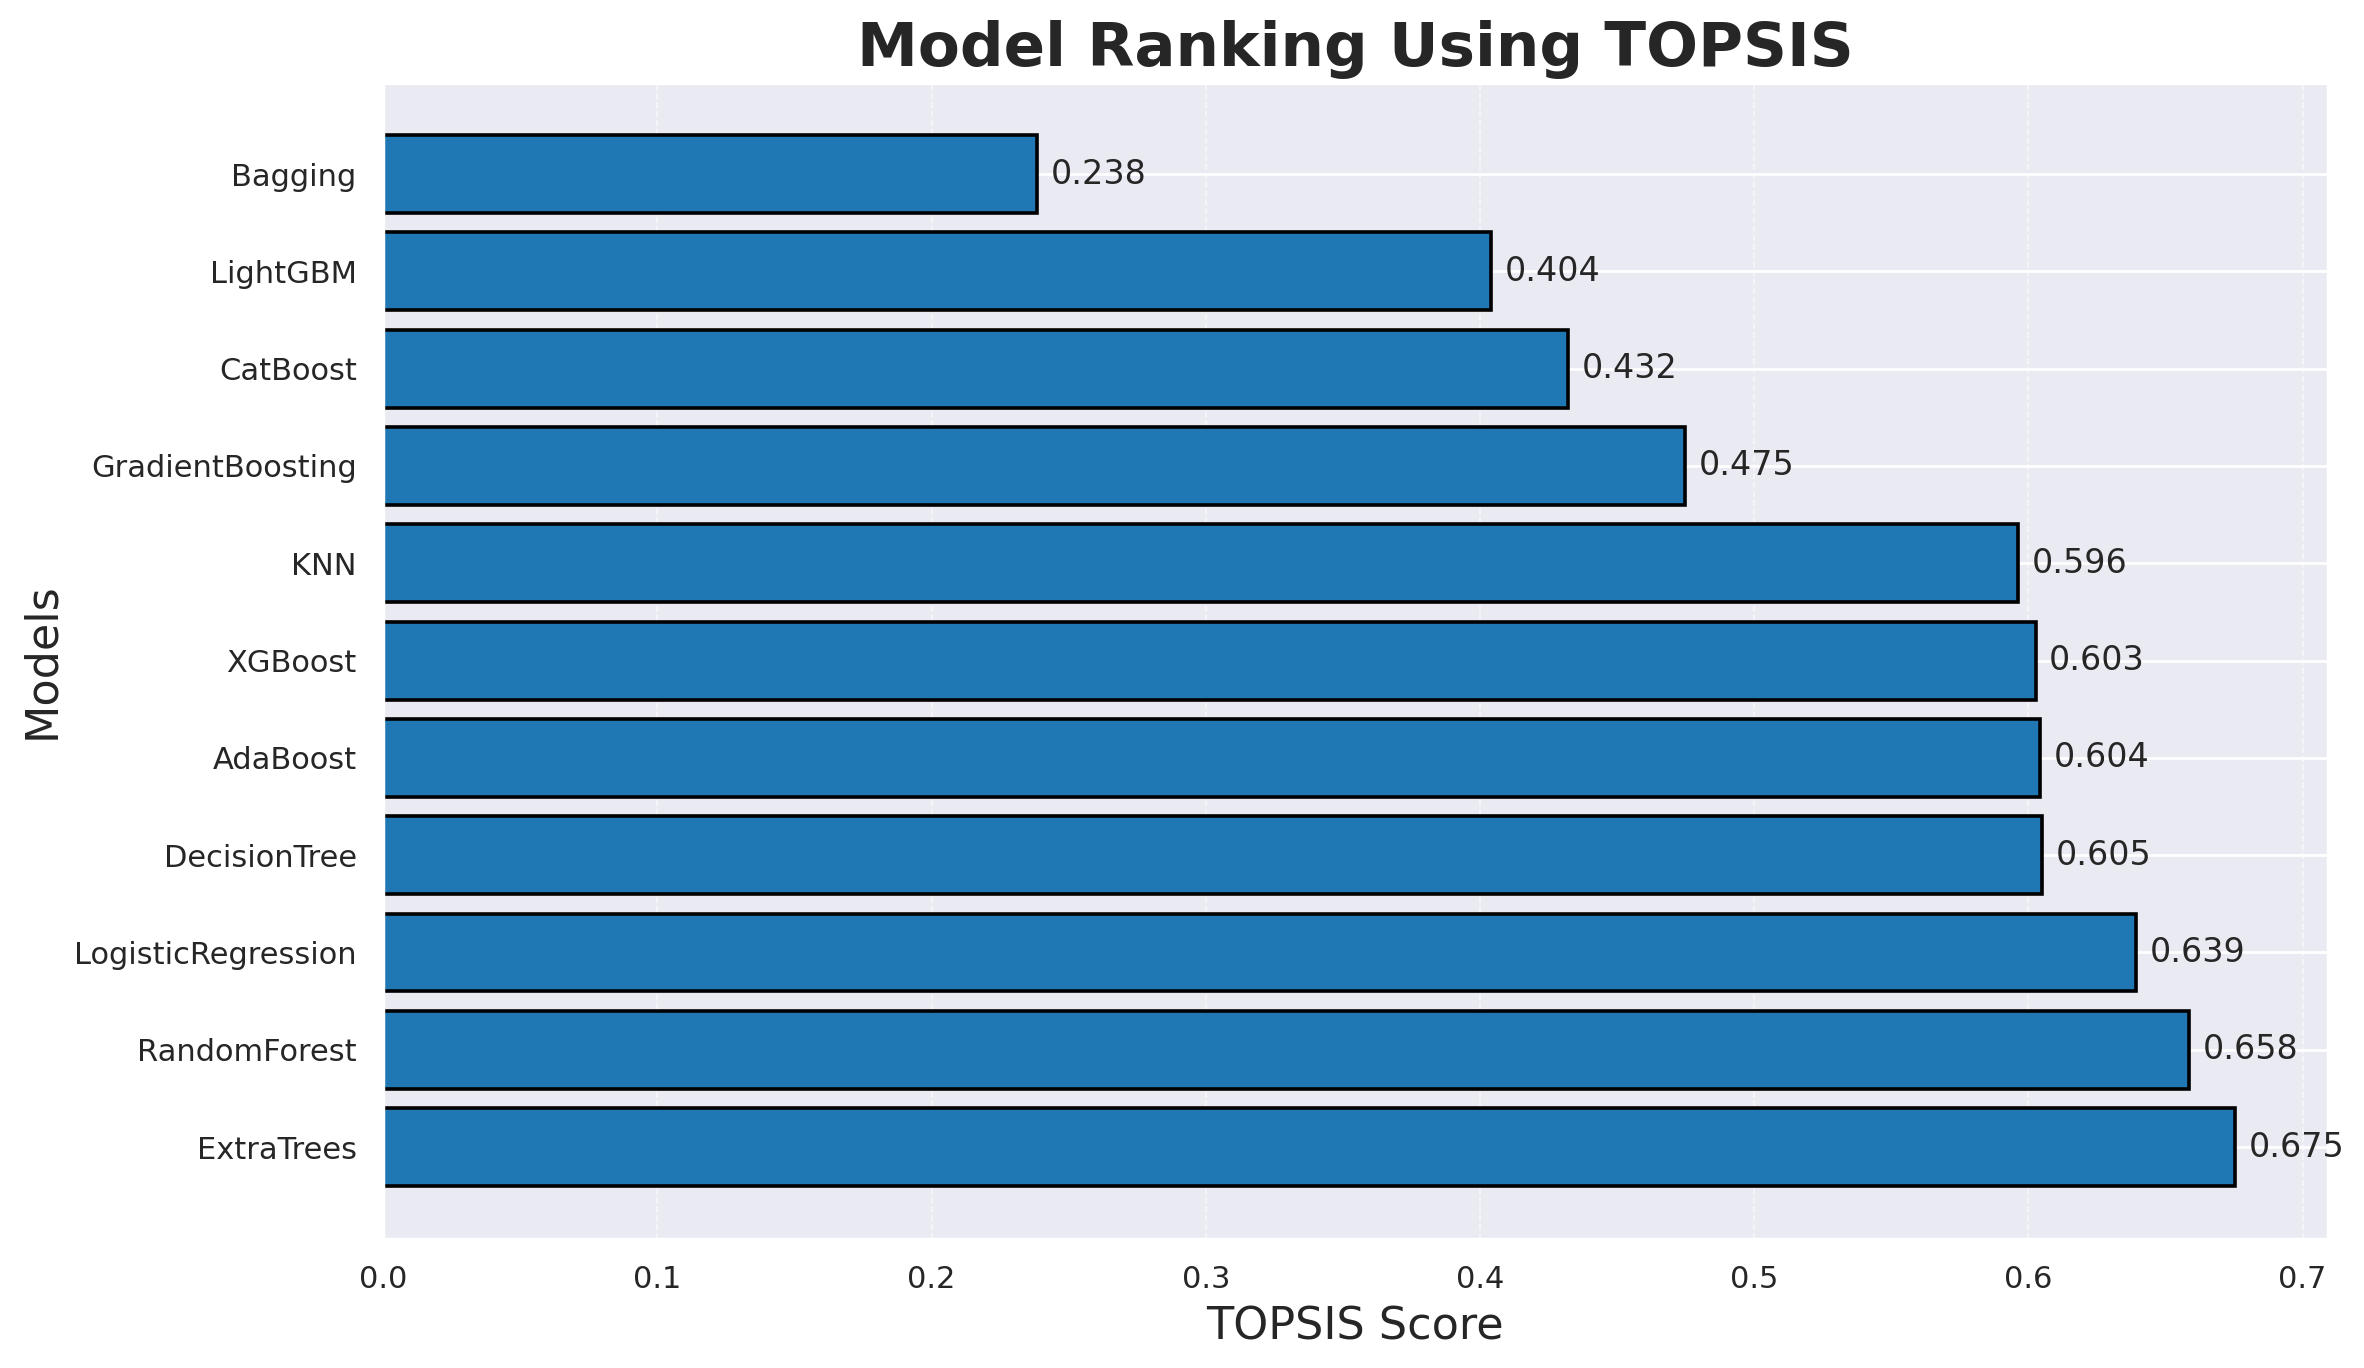


Best model according to TOPSIS: ExtraTrees


KeyError: 'model_object'

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

# ---------------------------
# 1. TOPSIS PERFORMANCE TABLE
# ---------------------------
performance_df = pd.DataFrame([{
    "Model": r["model"],
    "ROC_AUC": r["roc_auc"],
    "Accuracy": r["accuracy"],
    "Precision": r["precision"],
    "Recall": r["recall"],
    "F1": r["f1"]
} for r in results])

performance_df.set_index("Model", inplace=True)

# ---------------------------
# 2. TOPSIS Implementation
# ---------------------------
# Step 1: Normalize the matrix
matrix = performance_df.values
norm_matrix = matrix / np.sqrt((matrix**2).sum(axis=0))

# ---------------------------
#  NEW WEIGHTS (sum = 1)
#  Since PR_AUC was removed, weights must match 5 metrics
#  Adjust these if needed.
# ---------------------------
weights = np.array([0.30, 0.20, 0.15, 0.15, 0.20])  # ROC_AUC, Acc, Prec, Recall, F1

weighted_matrix = norm_matrix * weights

# Step 3: Ideal best & worst
ideal_best = weighted_matrix.max(axis=0)
ideal_worst = weighted_matrix.min(axis=0)

# Step 4: Distances
dist_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))

# Step 5: TOPSIS score
performance_df['TOPSIS_score'] = dist_worst / (dist_best + dist_worst)
performance_df['Rank'] = performance_df['TOPSIS_score'].rank(ascending=False).astype(int)

# Sort by rank
performance_df = performance_df.sort_values('Rank')

print("\nTOPSIS ranking of models:")
print(performance_df[['TOPSIS_score', 'Rank']])

# ---------------------------
# 3. TOPSIS BAR CHART (HIGH QUALITY)
# ---------------------------
plt.figure(figsize=(12, 7), dpi=200)
bars = plt.barh(performance_df.index, performance_df['TOPSIS_score'],
                color="#1f78b4", edgecolor="black", linewidth=1.3)

plt.xlabel("TOPSIS Score", fontsize=16)
plt.ylabel("Models", fontsize=16)
plt.title("Model Ranking Using TOPSIS", fontsize=22, fontweight='bold')
plt.grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.6)

# Annotate scores
for bar in bars:
    w = bar.get_width()
    plt.text(w + 0.005, bar.get_y() + bar.get_height()/2,
             f"{w:.3f}", fontsize=12, va='center')

plt.tight_layout()
plt.show()

# ================================================================
# ---------------------- SHAP ANALYSIS ----------------------------
# ================================================================

# Identify BEST model from TOPSIS
best_model_name = performance_df.index[0]
print("\nBest model according to TOPSIS:", best_model_name)

# Extract fitted model object from results list
best_model = [r["model_object"] for r in results if r["model"] == best_model_name][0]



Performing SHAP analysis for the best model: ExtraTrees

Generating SHAP Summary Plot (Bar Chart)...


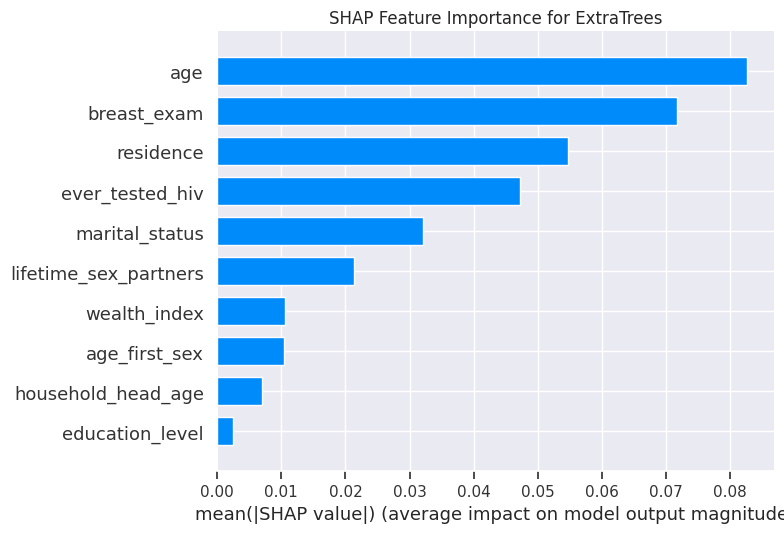


Generating SHAP Waterfall Plot for a single instance...


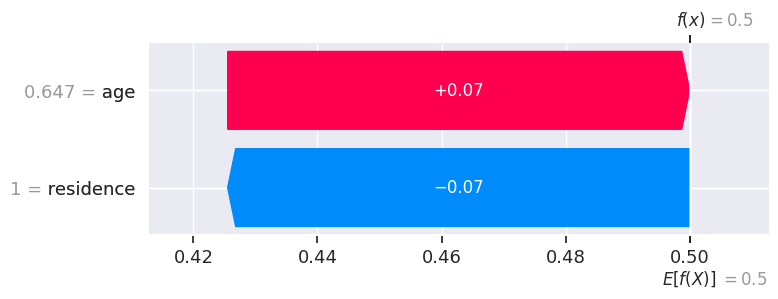

<Figure size 640x480 with 0 Axes>

In [207]:
import shap
import matplotlib.pyplot as plt
import numpy as np # Import numpy for ndarray check

# Identify the best model from the previous analysis (ExtraTrees had the highest TOPSIS score)
best_model_name = performance_df.index[0]  # Get the model with Rank 1
best_model = final_models[best_model_name] # Get model directly from final_models

print(f"Performing SHAP analysis for the best model: {best_model_name}")

# Ensure X_test_sel is a DataFrame for SHAP plots
# If it's a numpy array after previous operations, convert it back
if not isinstance(X_test_sel, pd.DataFrame):
    X_test_sel = pd.DataFrame(X_test_sel, columns=selected_features)

# Create a SHAP explainer
# For tree-based models like ExtraTrees, TreeExplainer is appropriate
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values
# For binary classification, shap_values will be a list of two arrays (one for each class)
# or a 3D array (num_samples, num_features, num_classes).
# We need the values for the positive class (class 1).
shap_values = explainer.shap_values(X_test_sel)

# --- SHAP Summary Plot (Bar Chart) ---
print("\nGenerating SHAP Summary Plot (Bar Chart)...")
# If shap_values is a list (typical for TreeExplainer binary output), take the second element.
# If it's a 3D array, take the slice for class 1.
if isinstance(shap_values, list):
    shap_values_for_plot = shap_values[1]
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    shap_values_for_plot = shap_values[:, :, 1]
else: # Fallback, assume it's already the correct 2D array if not list/3D
    shap_values_for_plot = shap_values

shap.summary_plot(shap_values_for_plot, X_test_sel, plot_type="bar", show=False)
plt.title(f"SHAP Feature Importance for {best_model_name}")
plt.tight_layout()
plt.show()

# --- SHAP Waterfall Plot for a single instance ---
print("\nGenerating SHAP Waterfall Plot for a single instance...")
# Select an instance from the test set (e.g., the first one)
instance_index = 0
instance_data = X_test_sel.iloc[instance_index]
instance_shap_values = explainer.shap_values(instance_data)

# Waterfall plot for the positive class (assuming binary classification)
# Adjust base_values and shap_values indexing based on their structure.
# Check if explainer.expected_value is a sequence (list or 1D array) and has multiple elements.
if hasattr(explainer.expected_value, '__len__') and len(explainer.expected_value) > 1:
    expected_value_for_plot = explainer.expected_value[1]
else:
    # Assume it's a single scalar value if not a sequence with multiple elements
    expected_value_for_plot = explainer.expected_value

# Check if instance_shap_values is a sequence (list or 1D array) and has multiple elements.
if hasattr(instance_shap_values, '__len__') and len(instance_shap_values) > 1:
    instance_shap_values_for_plot = instance_shap_values[1]
else:
    # Assume it's already the 1D array for class 1 if not a sequence with multiple elements
    instance_shap_values_for_plot = instance_shap_values

shap.plots.waterfall(shap.Explanation(values=instance_shap_values_for_plot,
                                      base_values=expected_value_for_plot,
                                      data=instance_data,
                                      feature_names=X_test_sel.columns.tolist()))
plt.suptitle(f"SHAP Waterfall Plot for Instance {instance_index} ({best_model_name})")
plt.tight_layout()
plt.show()


Generating SHAP Summary Plot (Dot Plot)...


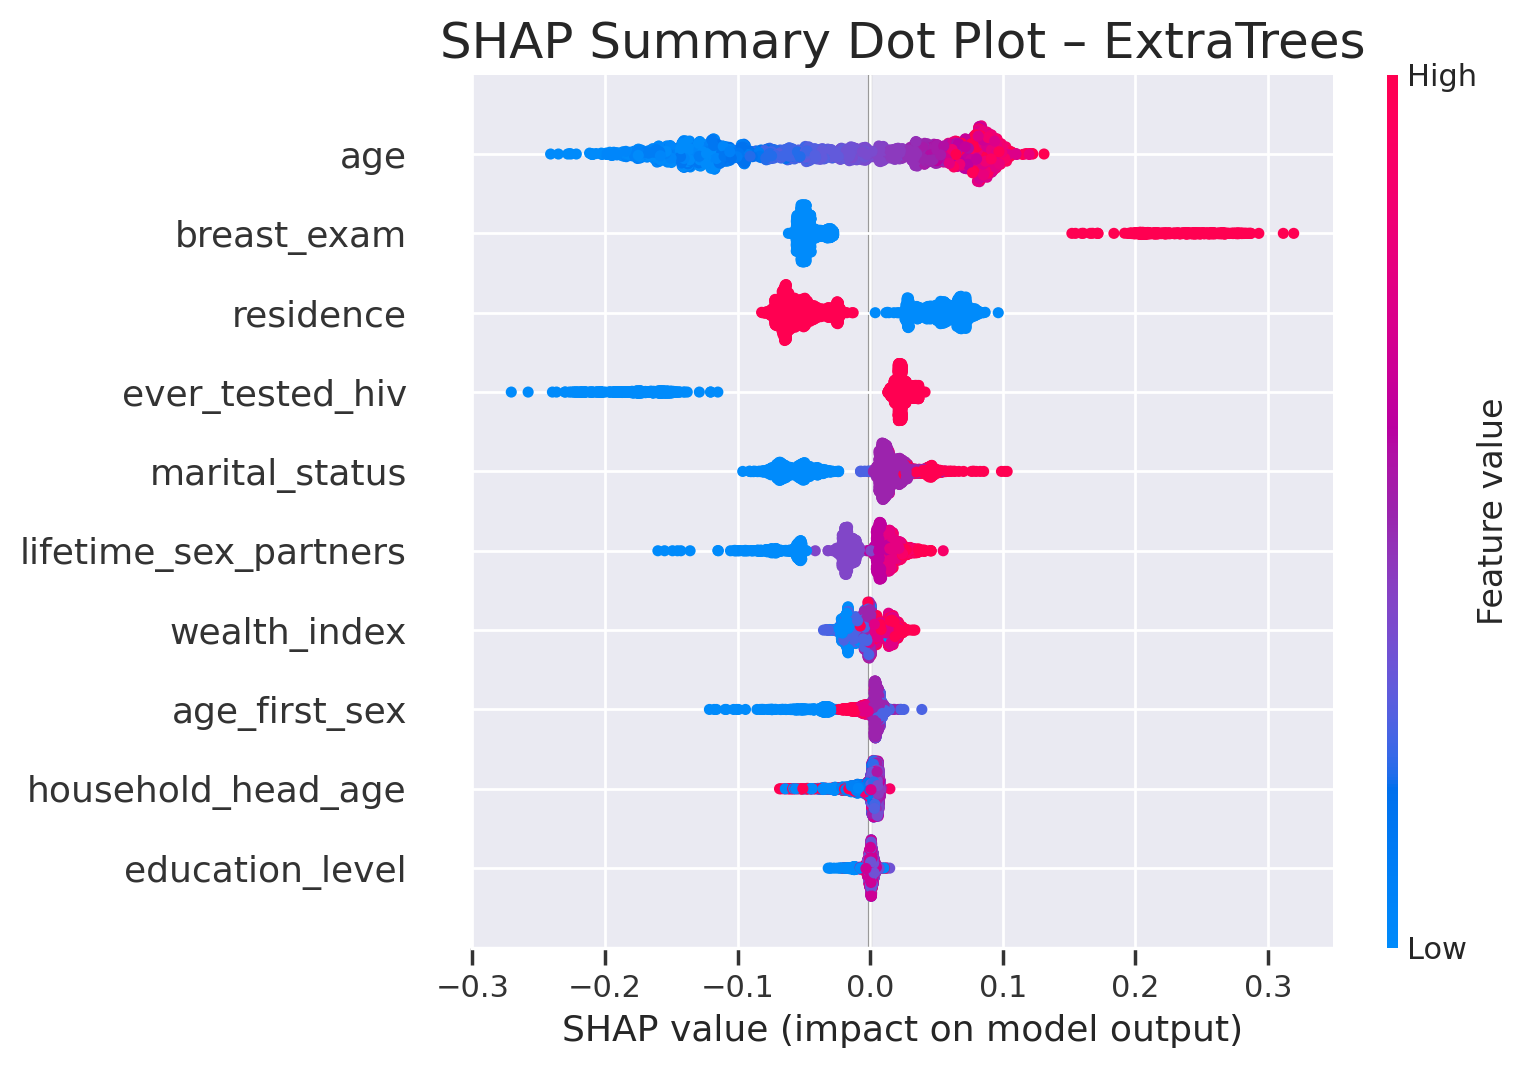

In [208]:
import matplotlib.pyplot as plt
import shap

print("\nGenerating SHAP Summary Plot (Dot Plot)...")

# Assuming shap_values_for_plot and X_test_sel are already defined from previous execution
# (shap_values_for_plot contains SHAP values for the positive class (class 1))

plt.figure(figsize=(12, 7), dpi=200)
shap.summary_plot(shap_values_for_plot, X_test_sel, show=False)
plt.title(f"SHAP Summary Dot Plot – {best_model_name}", fontsize=18)
plt.tight_layout()
plt.show()

Radar plot of metrics + TOPSIS ranking

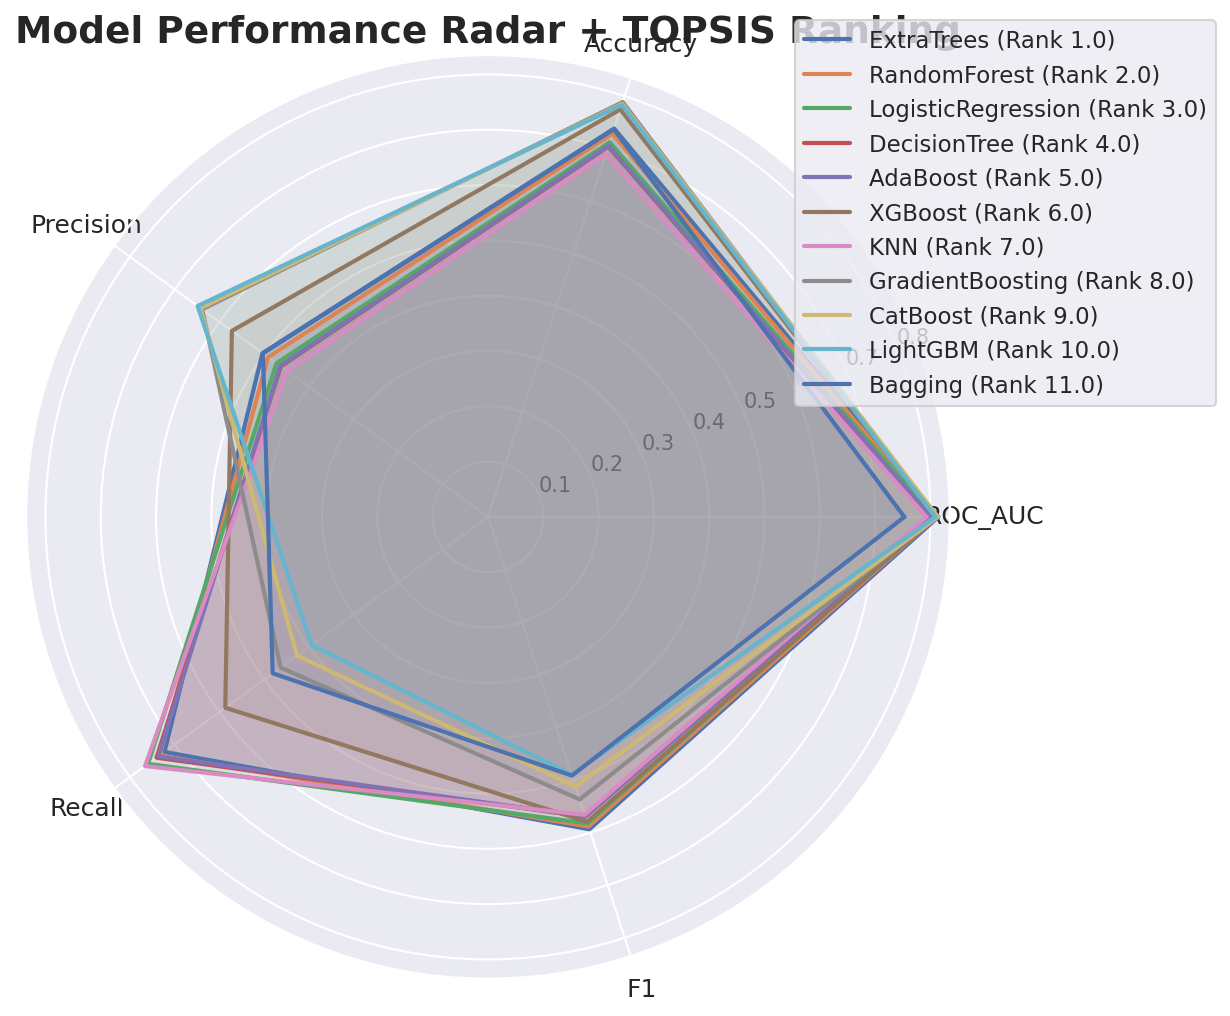

In [209]:
from math import pi

# Metrics for radar
metrics = ["ROC_AUC", "Accuracy", "Precision", "Recall", "F1"]
num_metrics = len(metrics)

# Angle for each axis
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]  # complete circle

plt.figure(figsize=(8,8), dpi=150)
ax = plt.subplot(111, polar=True)

# Plot each model
for idx, row in performance_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # complete circle
    ax.plot(angles, values, linewidth=2, label=f"{idx} (Rank {row['Rank']})")
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], metrics, fontsize=12)
plt.yticks(fontsize=10)
plt.title("Model Performance Radar + TOPSIS Ranking", fontsize=18, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.show()
